In [22]:
# system
import os
import sys
import pickle

# externals 
import pandas as pd
import awkward as ak
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Ellipse
import mplhep as hep
import seaborn as sns
hep.style.use("CMS")

In [23]:
indir = '../graph_construction/stats/task_0'
data = {}
for f in os.listdir(indir):
    data[f.split('.')[0]] = pd.read_csv(os.path.join(indir, f))

data.keys()

dict_keys(['OneProngNoPi0', 'ThreeProngsNoPi0', 'OneProngTwoPi0', 'ThreeProngsOnePi0', 'OneProngOnePi0'])

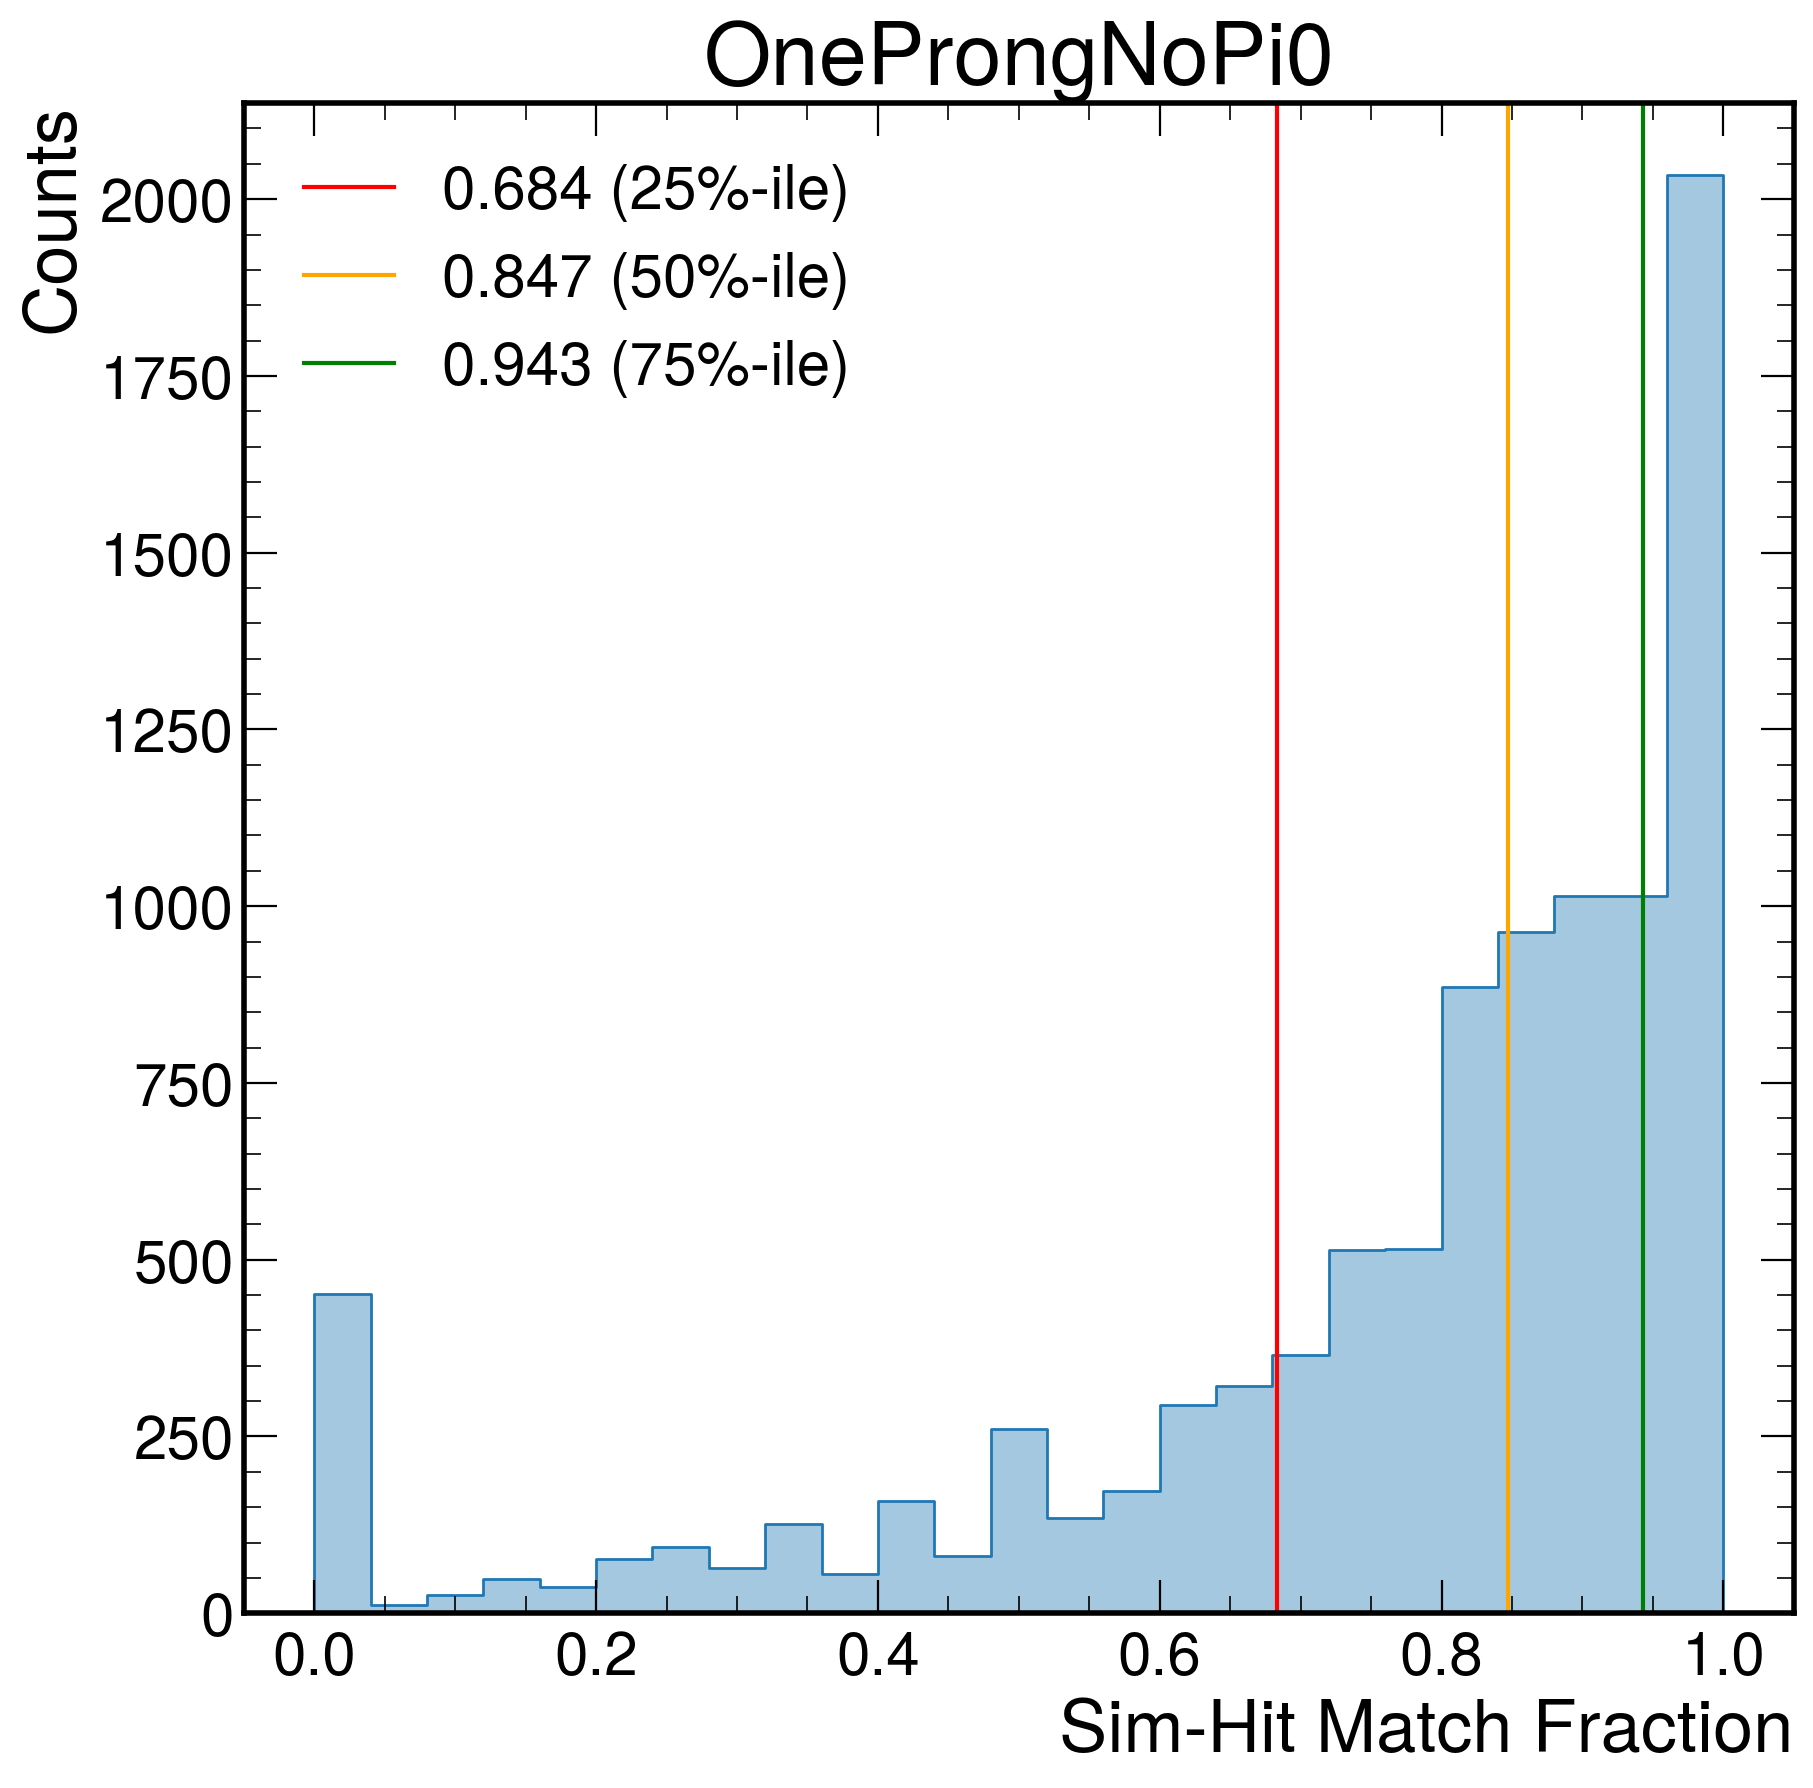

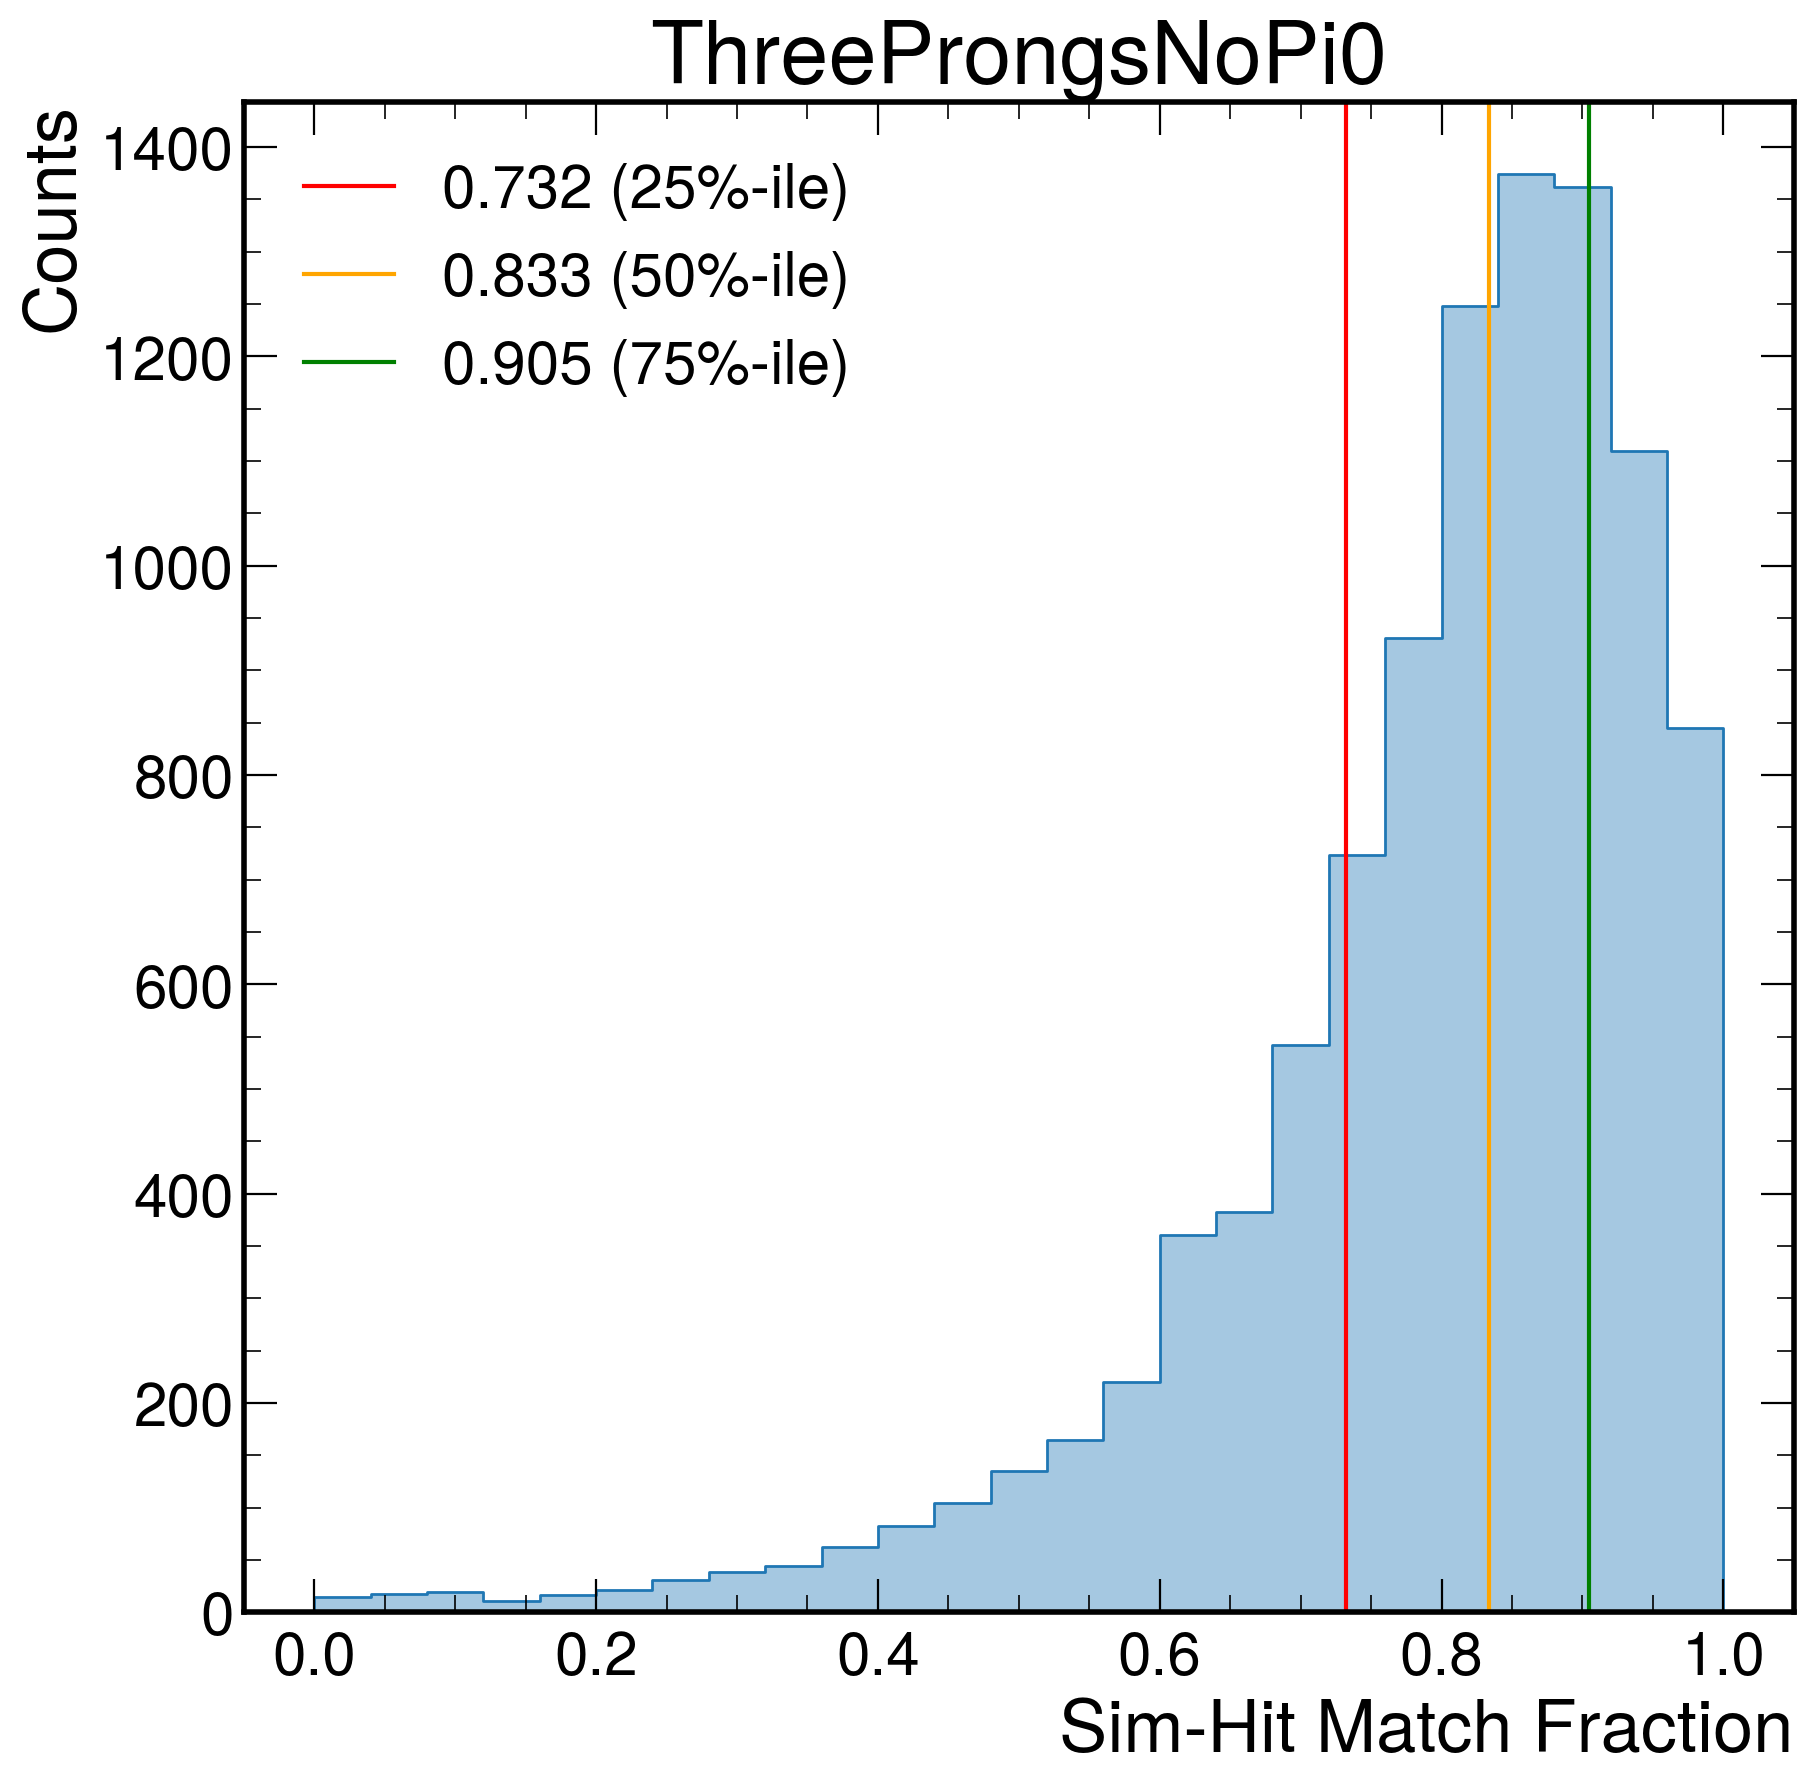

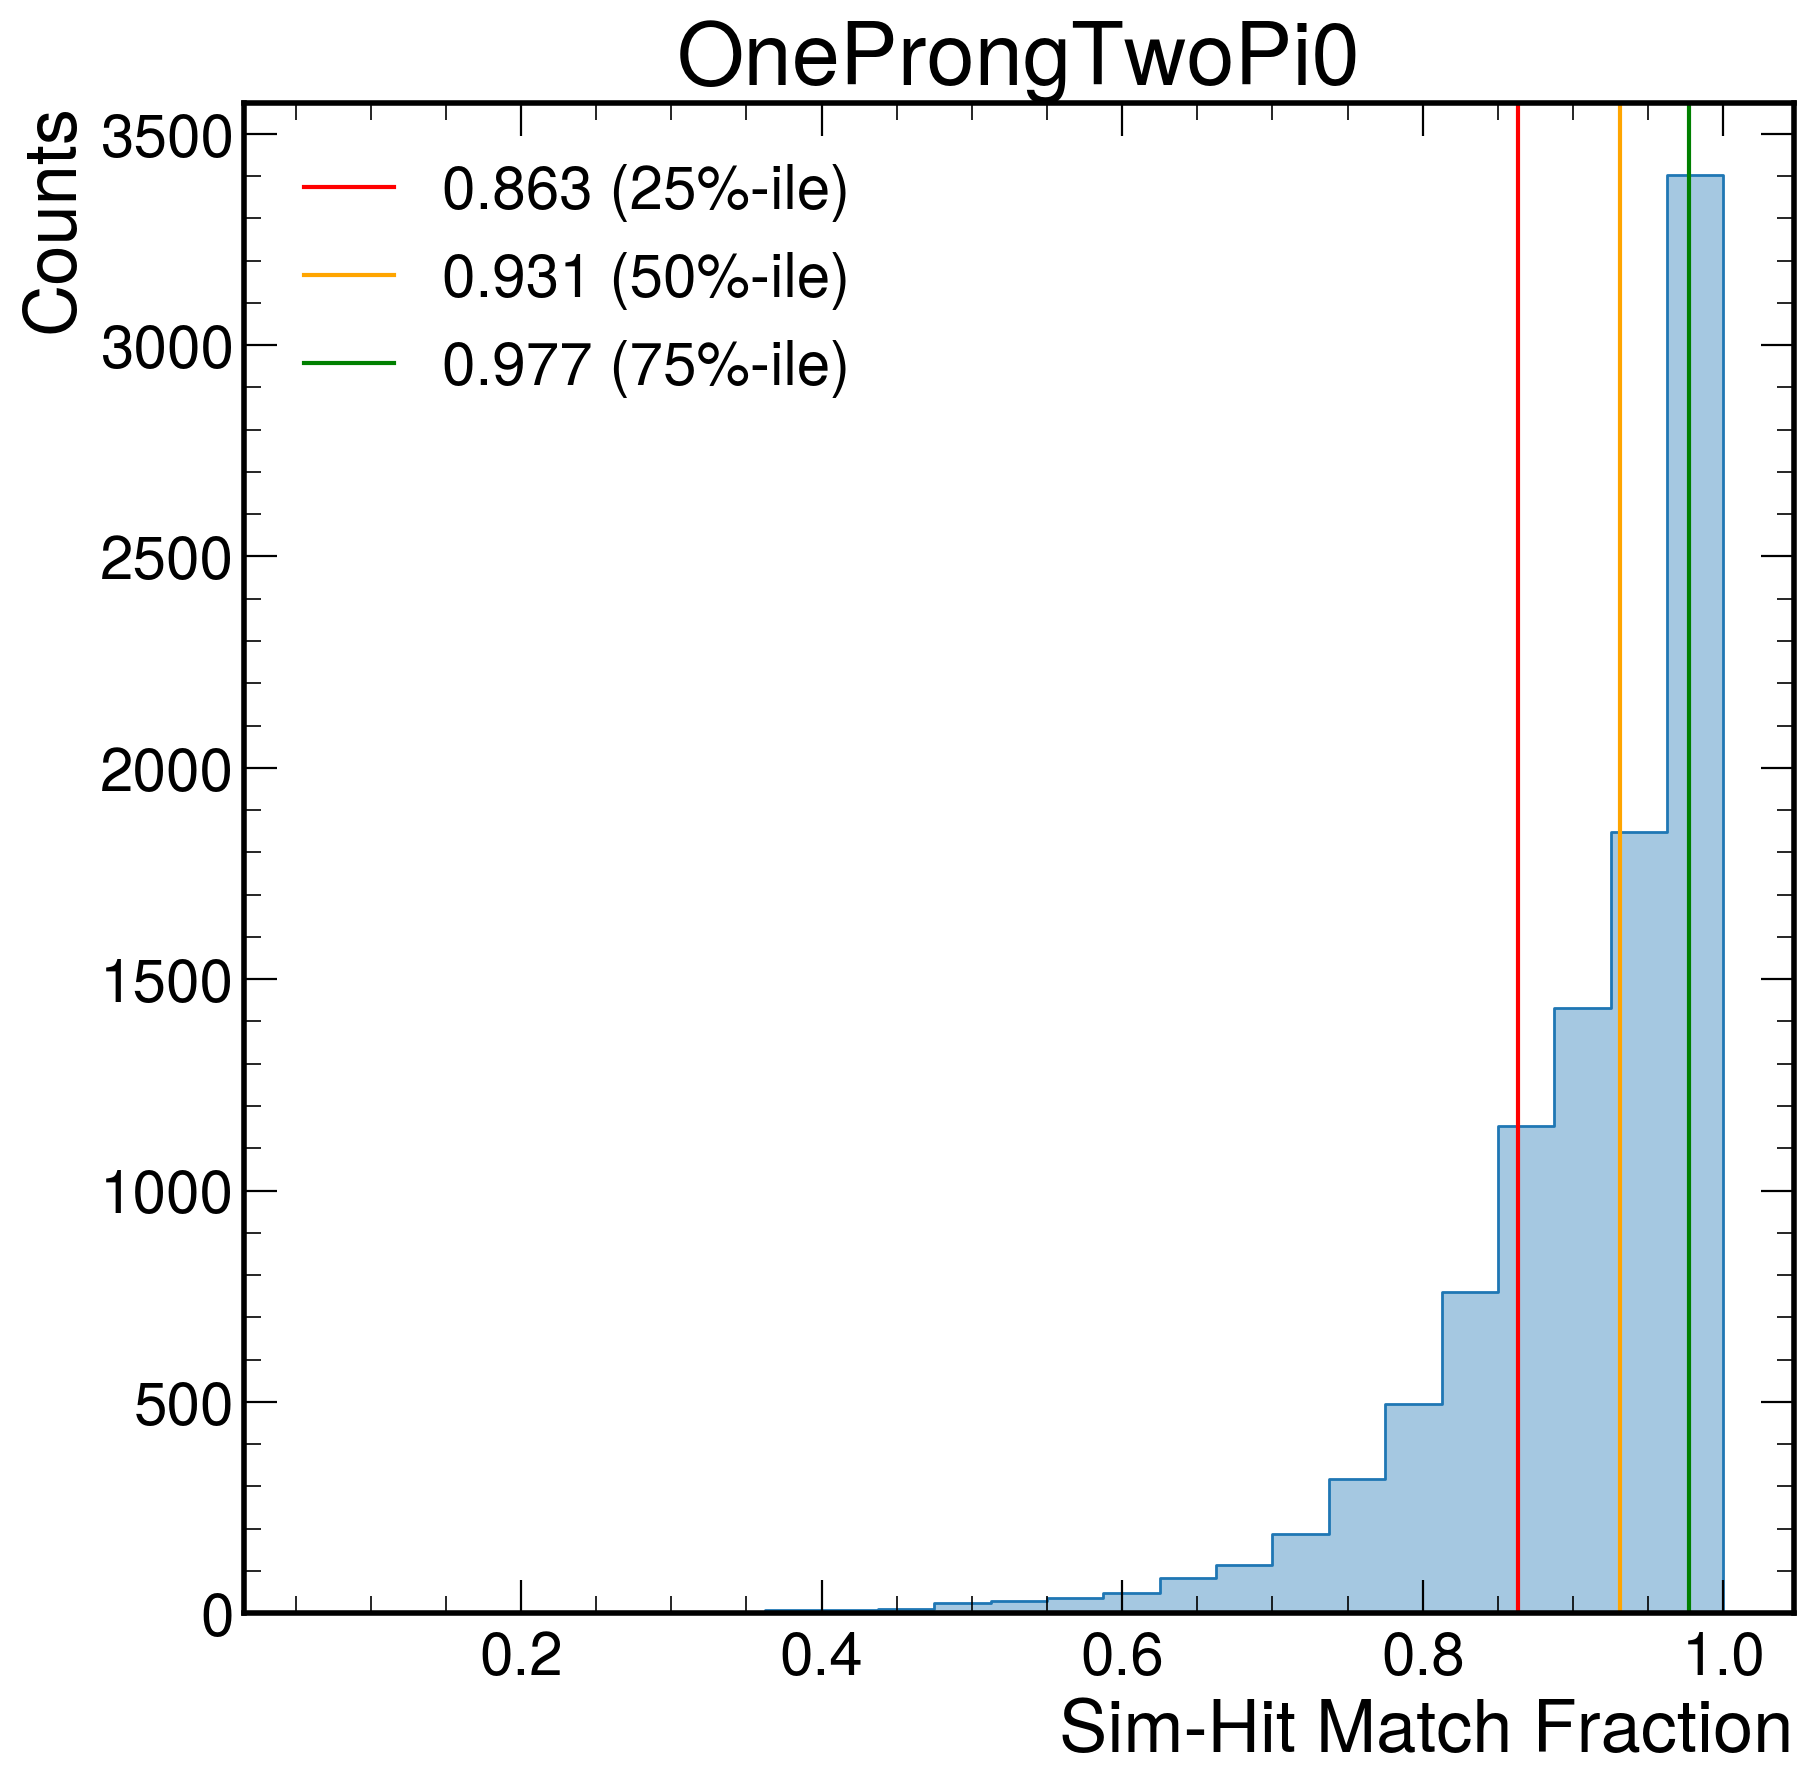

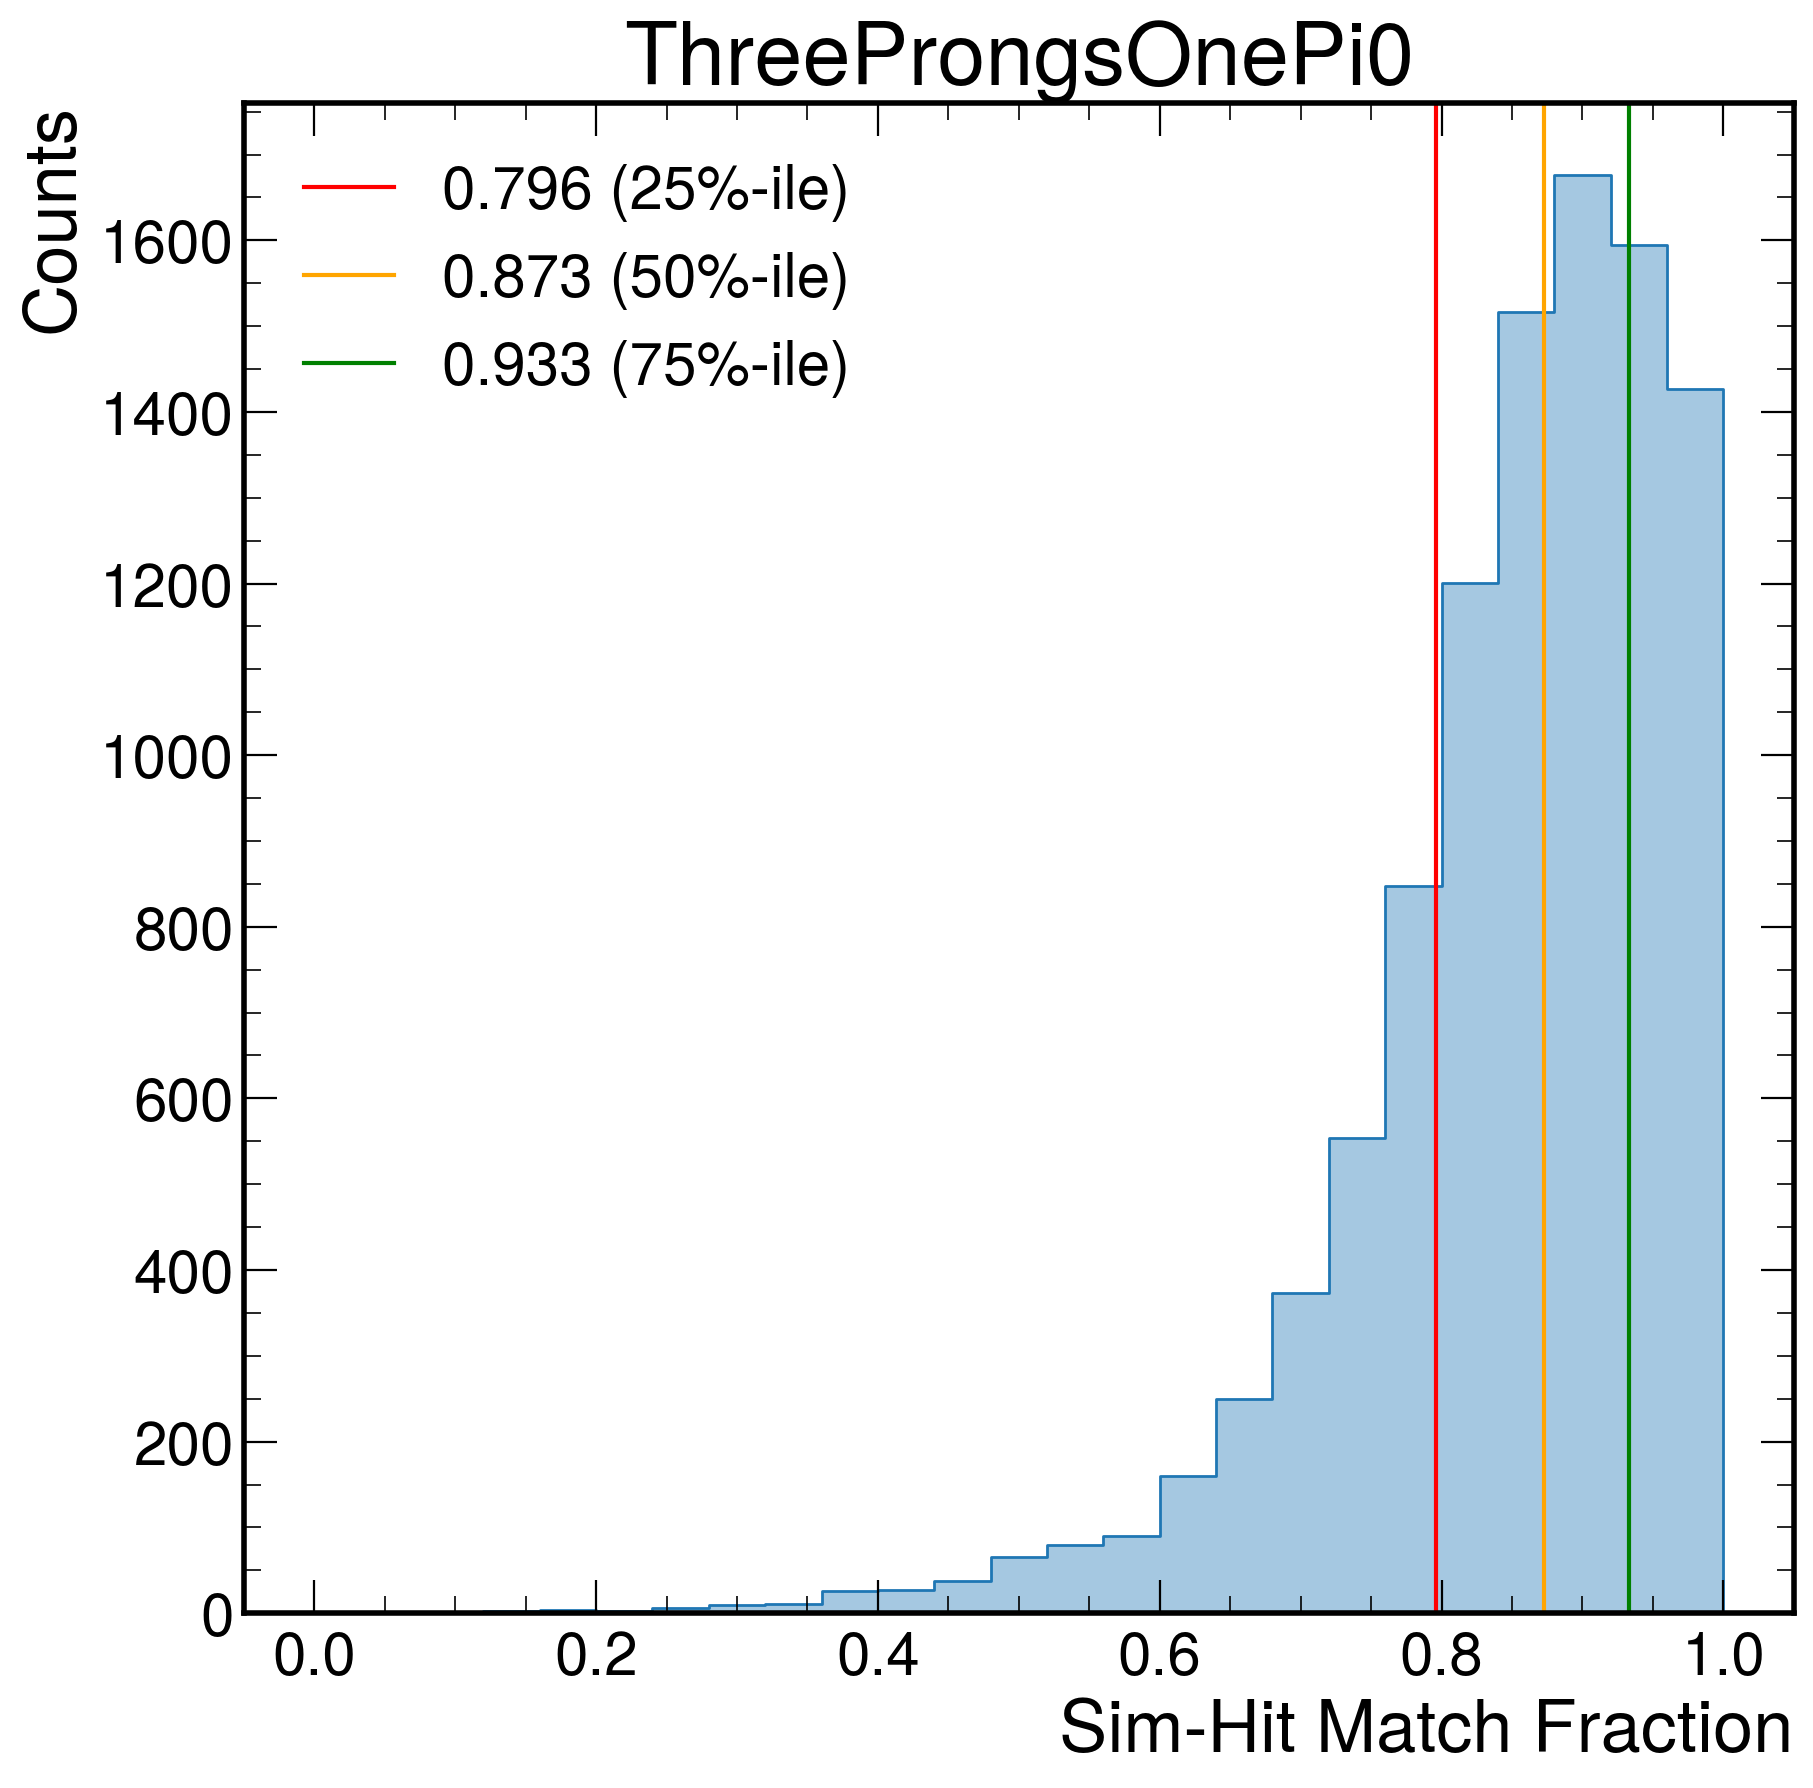

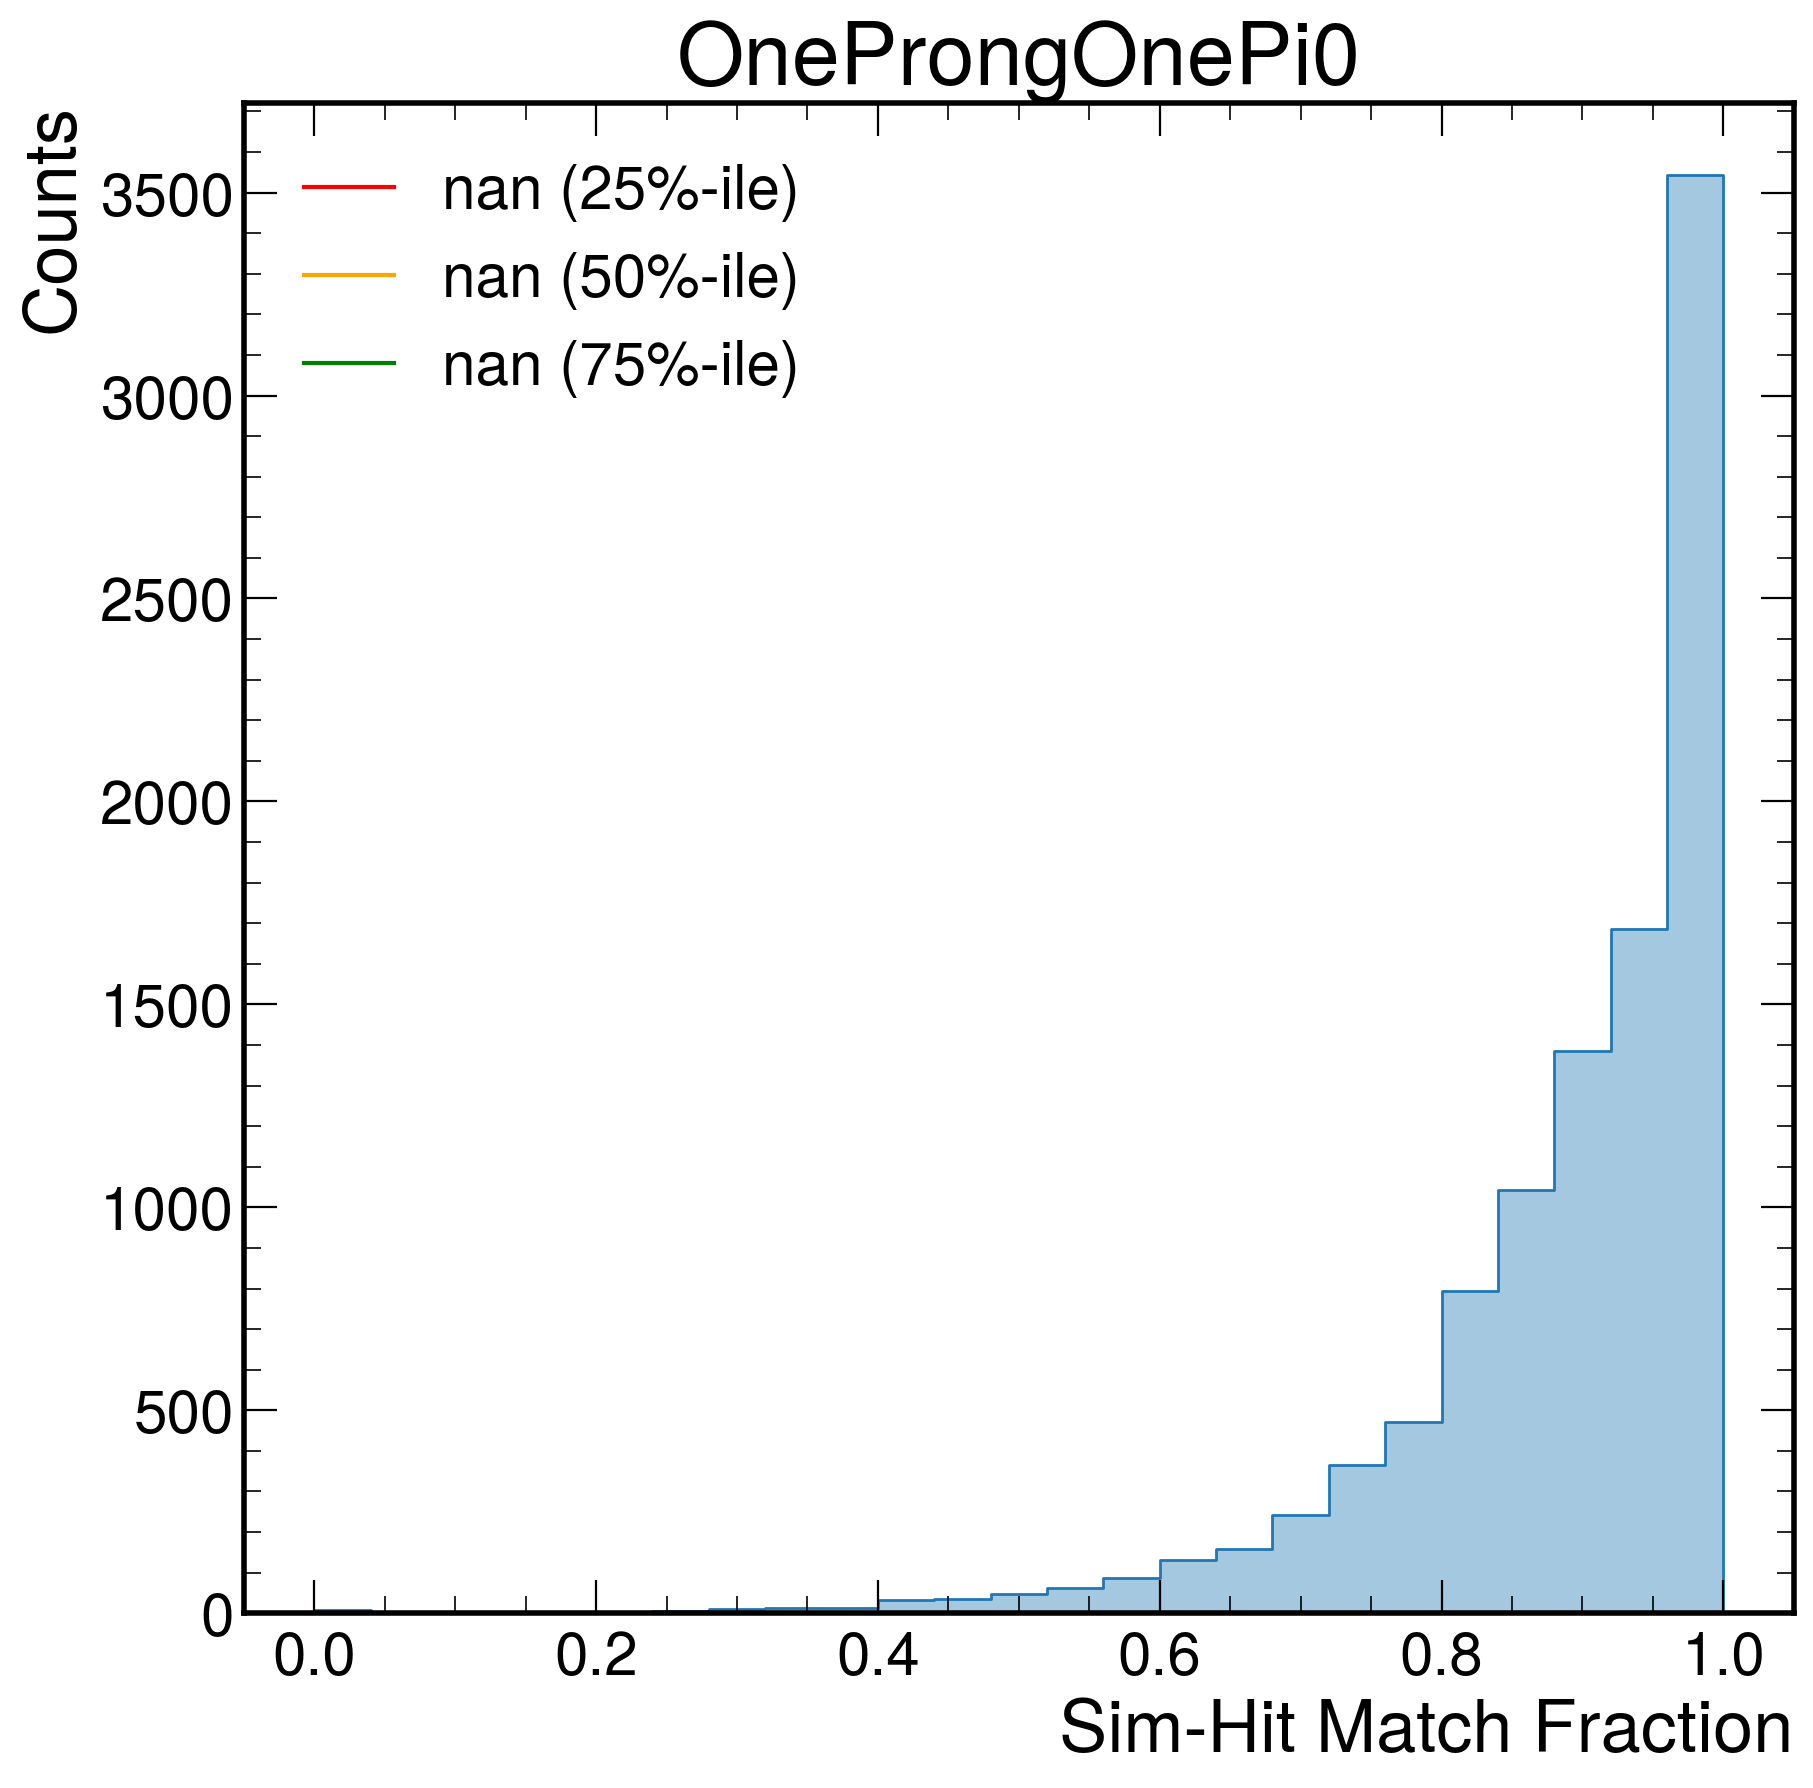

In [24]:
# plot the sim matching efficiency
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    
    fig = plt.figure(dpi=200)
    sns.histplot(sim_effs, bins=25, alpha=0.4, element='step')
    twenty_five = np.percentile(sim_effs, 25)
    plt.axvline(x=twenty_five, color='red',
                label=f"{twenty_five:.3f} (25%-ile)")
    fifty = np.percentile(sim_effs, 50)
    plt.axvline(x=fifty, color='orange',
                label=f"{fifty:.3f} (50%-ile)")
    seventy_five = np.percentile(sim_effs, 75)
    plt.axvline(x=seventy_five, color='green',
                label=f"{seventy_five:.3f} (75%-ile)")
    plt.legend(loc='upper left')
    plt.xlabel('Sim-Hit Match Fraction')
    plt.ylabel('Counts')
    plt.title(name)
    plt.show()

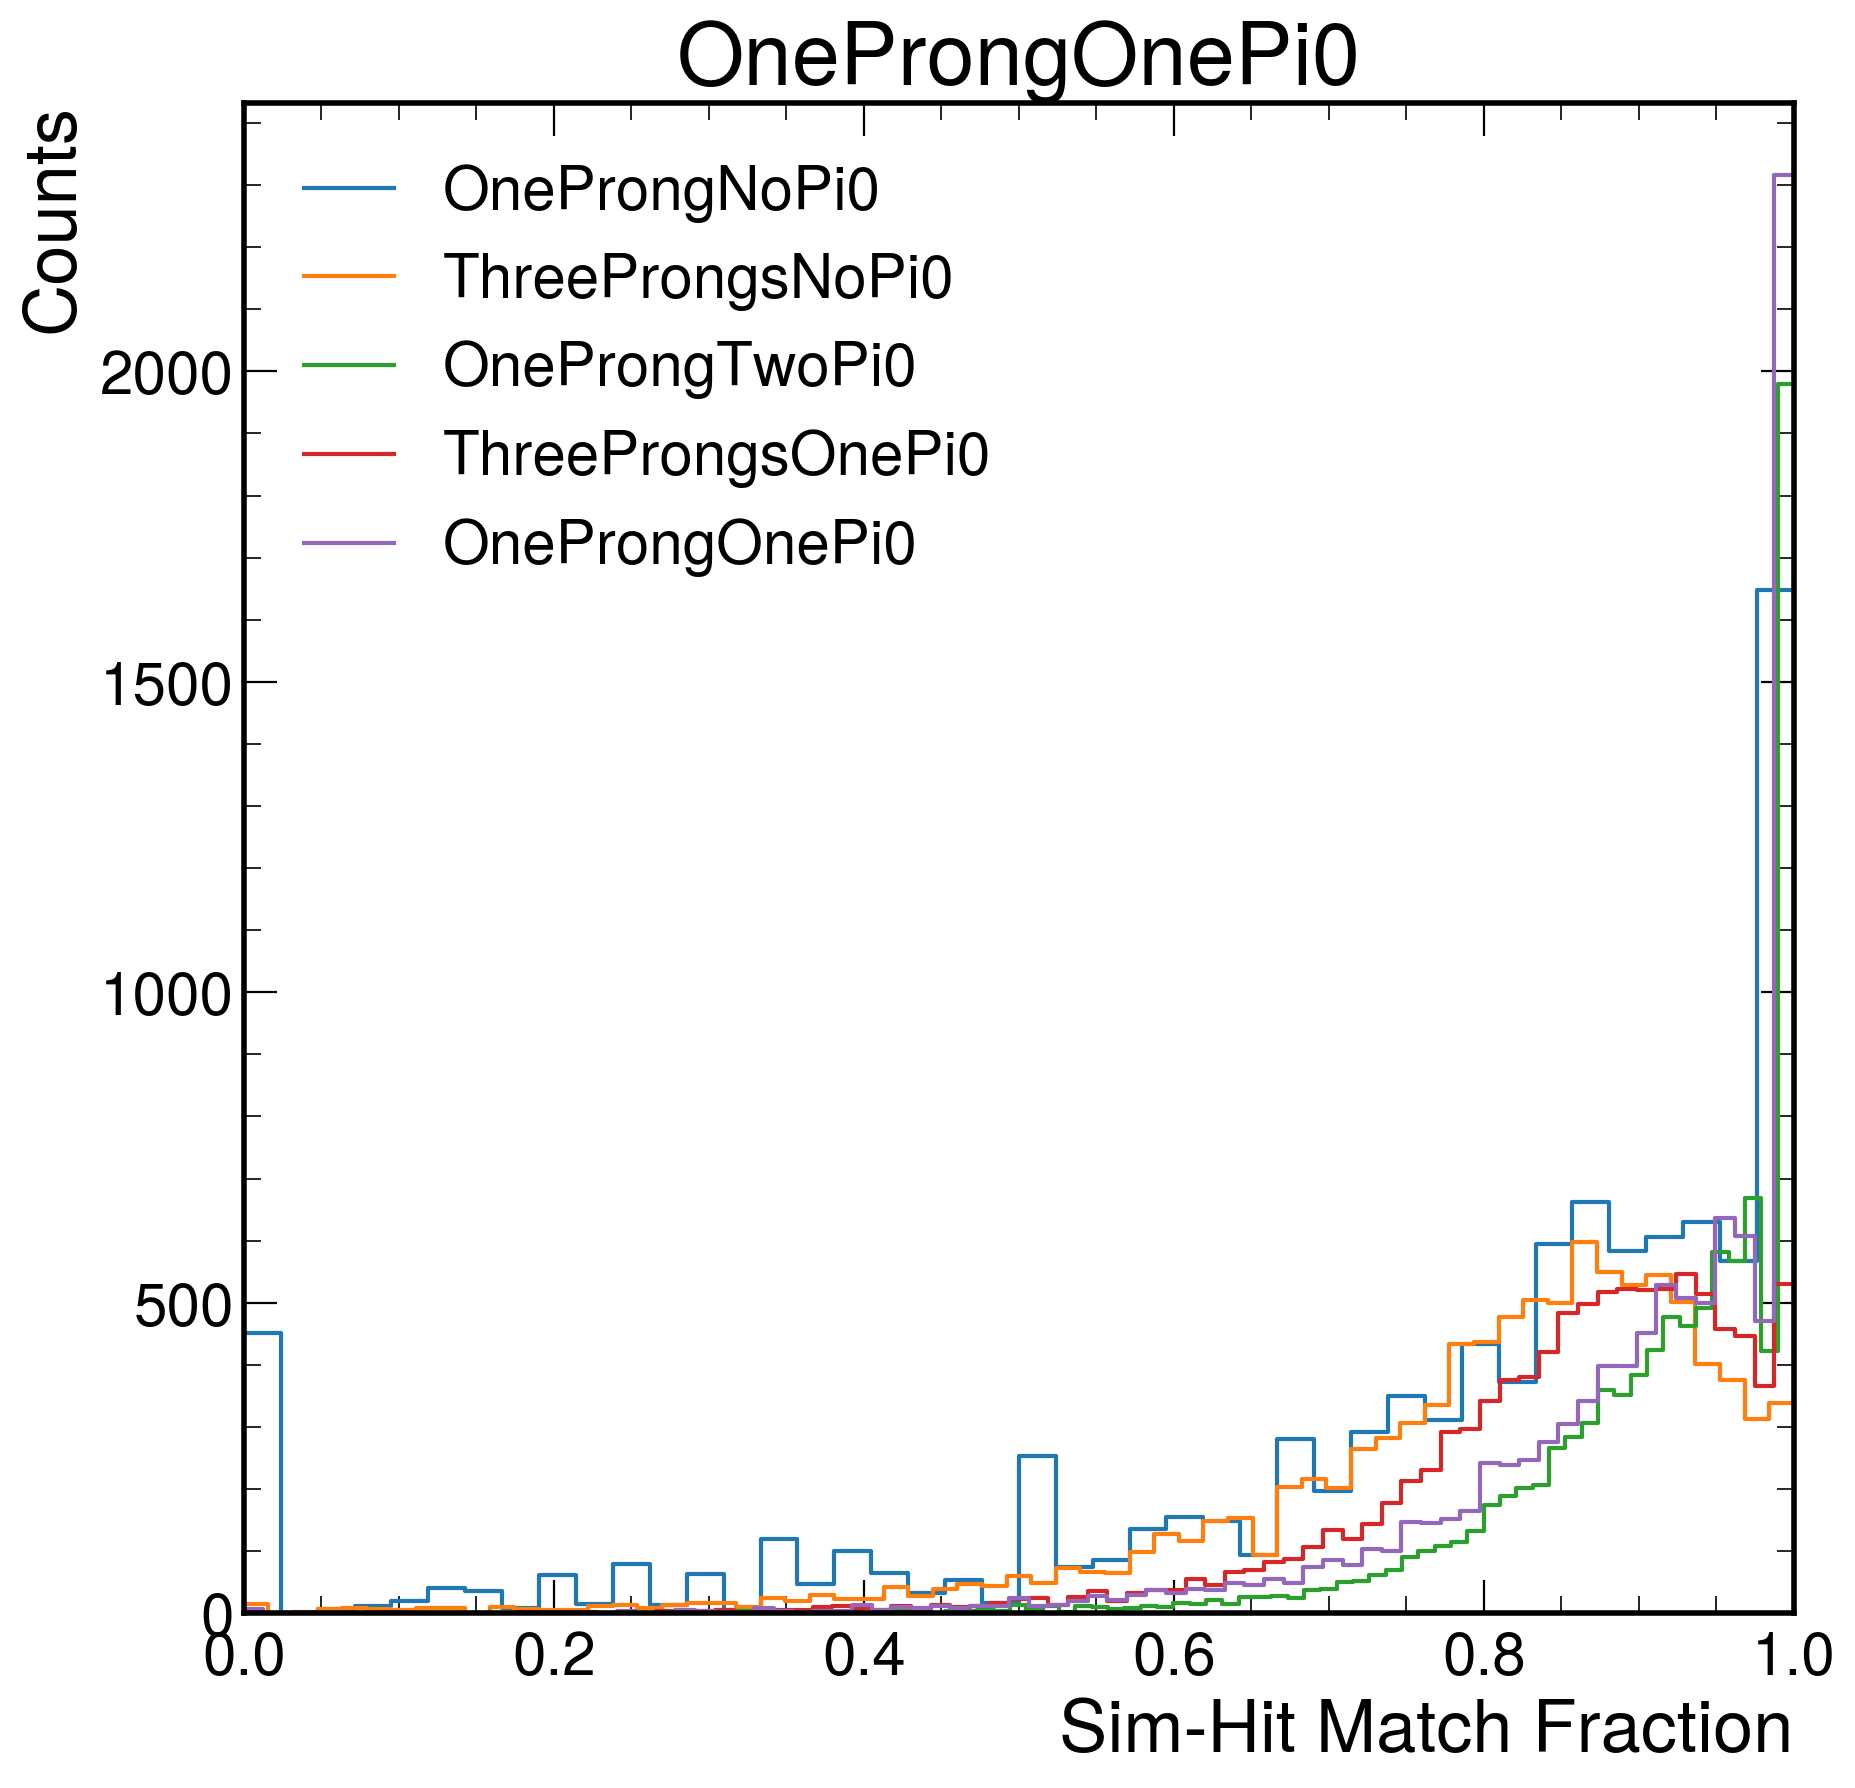

In [26]:
# plot the sim matching efficiency
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    sns.histplot(sim_effs, alpha=1, element='step', label=name, fill=False)

plt.legend(loc='upper left')
plt.xlabel('Sim-Hit Match Fraction')
plt.ylabel('Counts')
plt.title(name)
plt.xlim([-0, 1])
plt.show()


       total_sim_hits  matched_sim_hits  total_rec_hits  matched_rec_hits  \
0                  23              22.0          4416.0              42.0   
1                  29              28.0          4049.0              18.0   
2                  19              15.0          4889.0              25.0   
3                  48              31.0          4450.0               9.0   
4                  50              43.0          4193.0              67.0   
...               ...               ...             ...               ...   
10130              29              20.0         10304.0              52.0   
10131             107              78.0         10895.0             102.0   
10132              66              57.0          7050.0              86.0   
10133              59              55.0          9054.0              70.0   
10134              53              46.0         10124.0              93.0   

       sim_match_fraction  rec_match_fraction     tau_pt     vis_pt  
0    

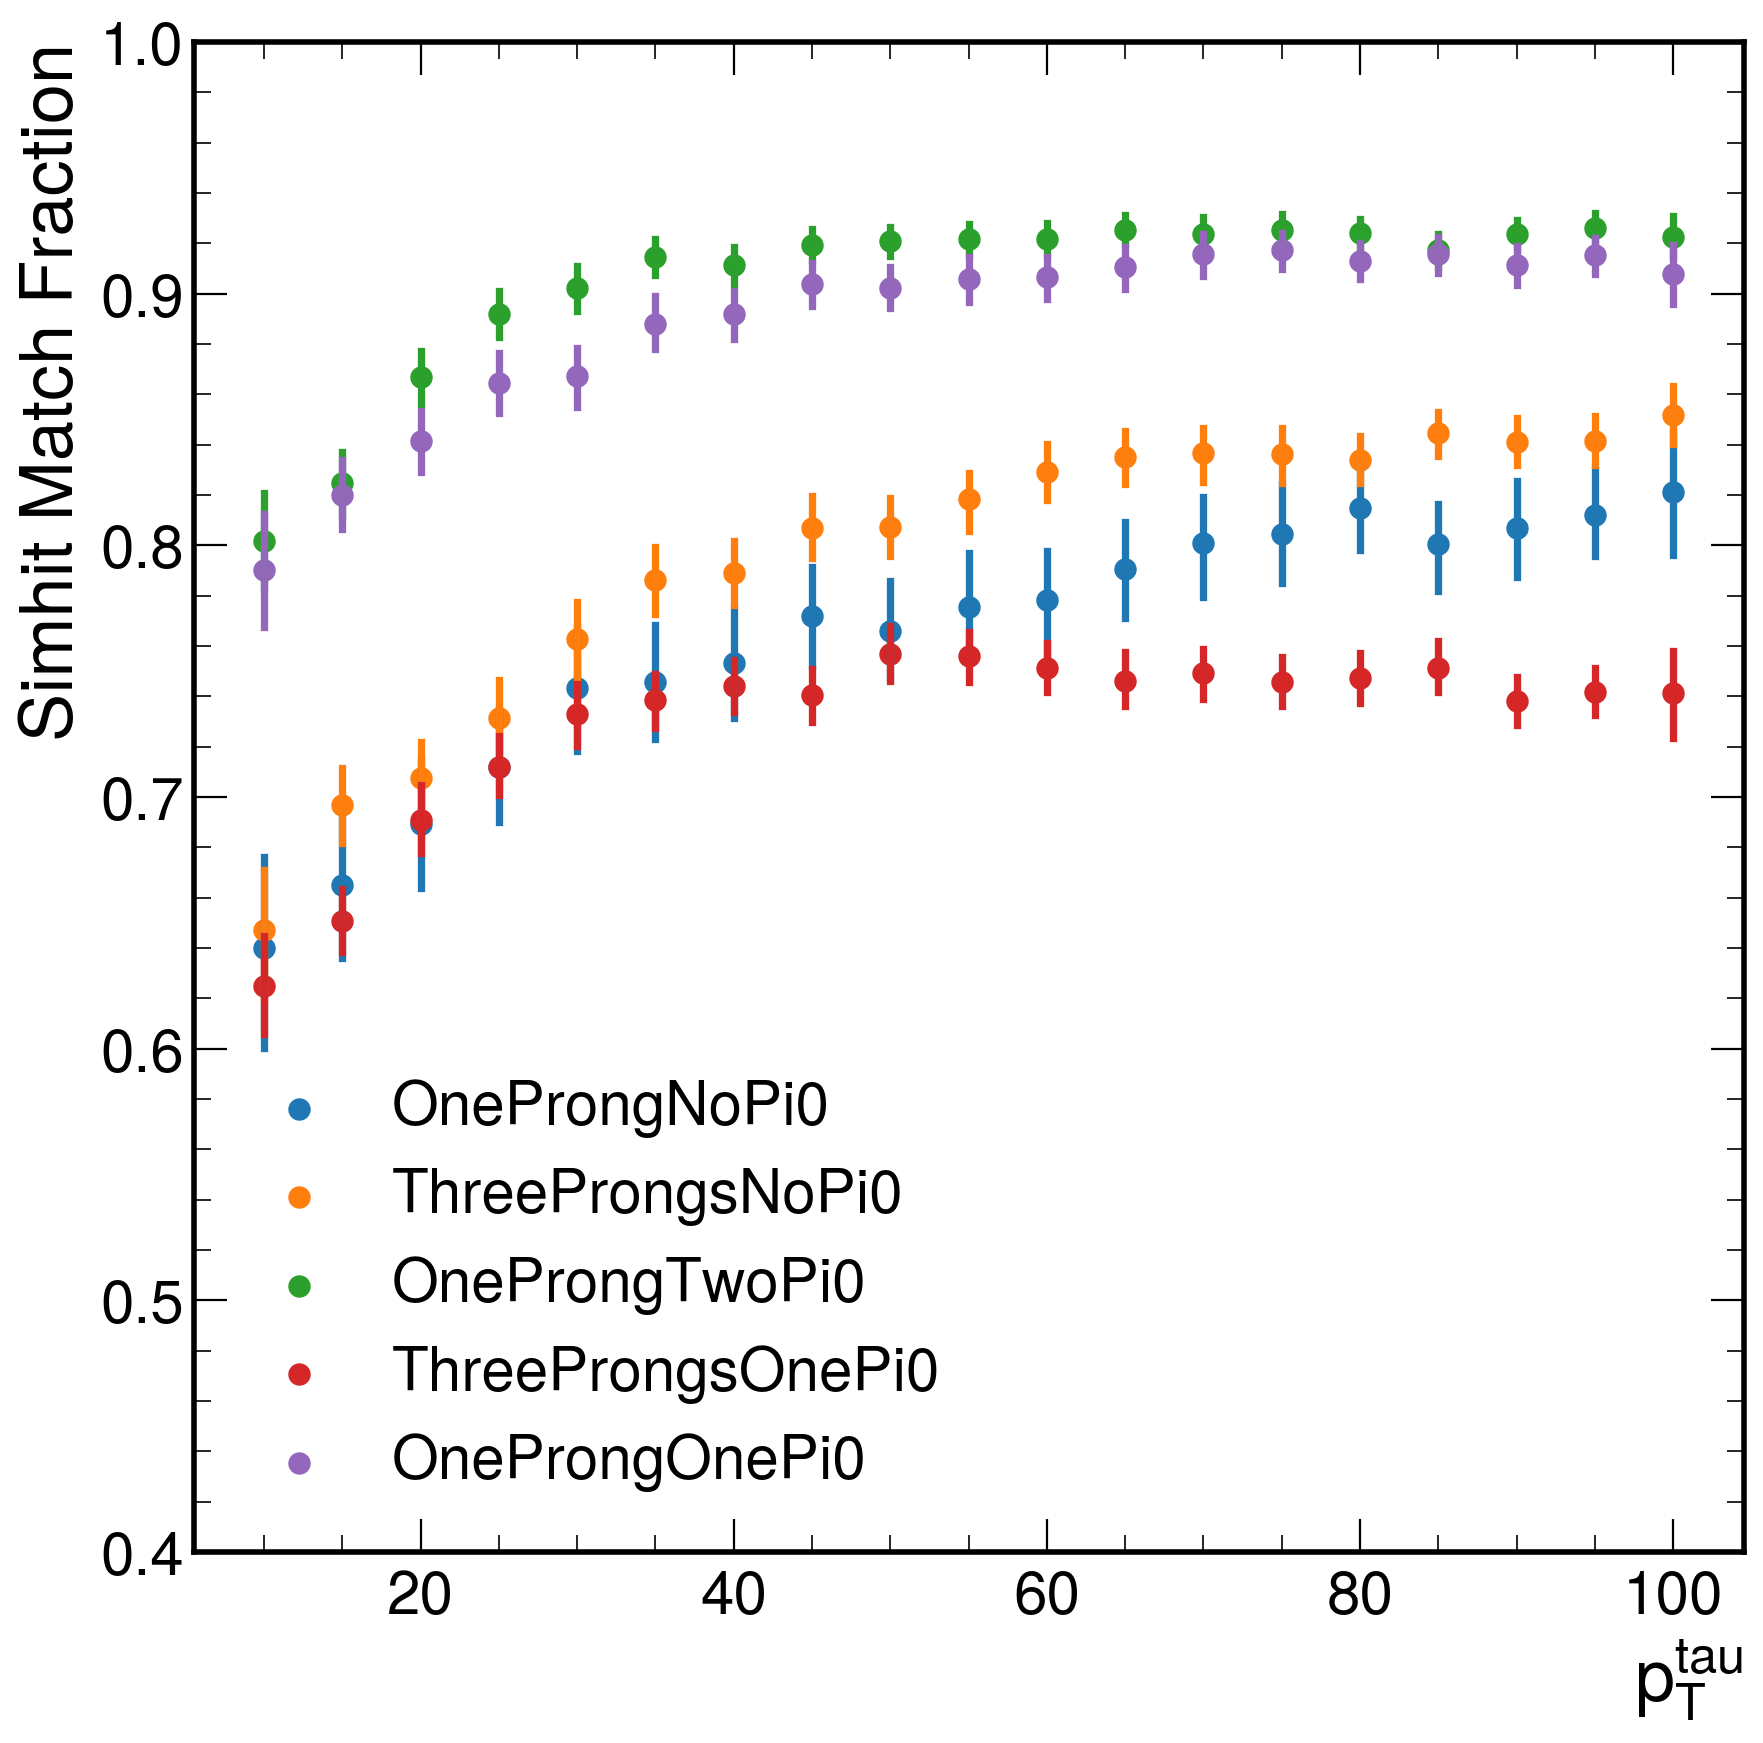

In [20]:
# study sim match eff as a function of tau pt
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    tau_pt = df['tau_pt']
    sns.regplot(x=tau_pt, y=sim_effs, x_bins=np.arange(0,120,5), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$p_T^\mathrm{tau}$")
plt.ylabel("Simhit Match Fraction")
plt.ylim([0.4, 1])
plt.legend(loc='best')
plt.show()

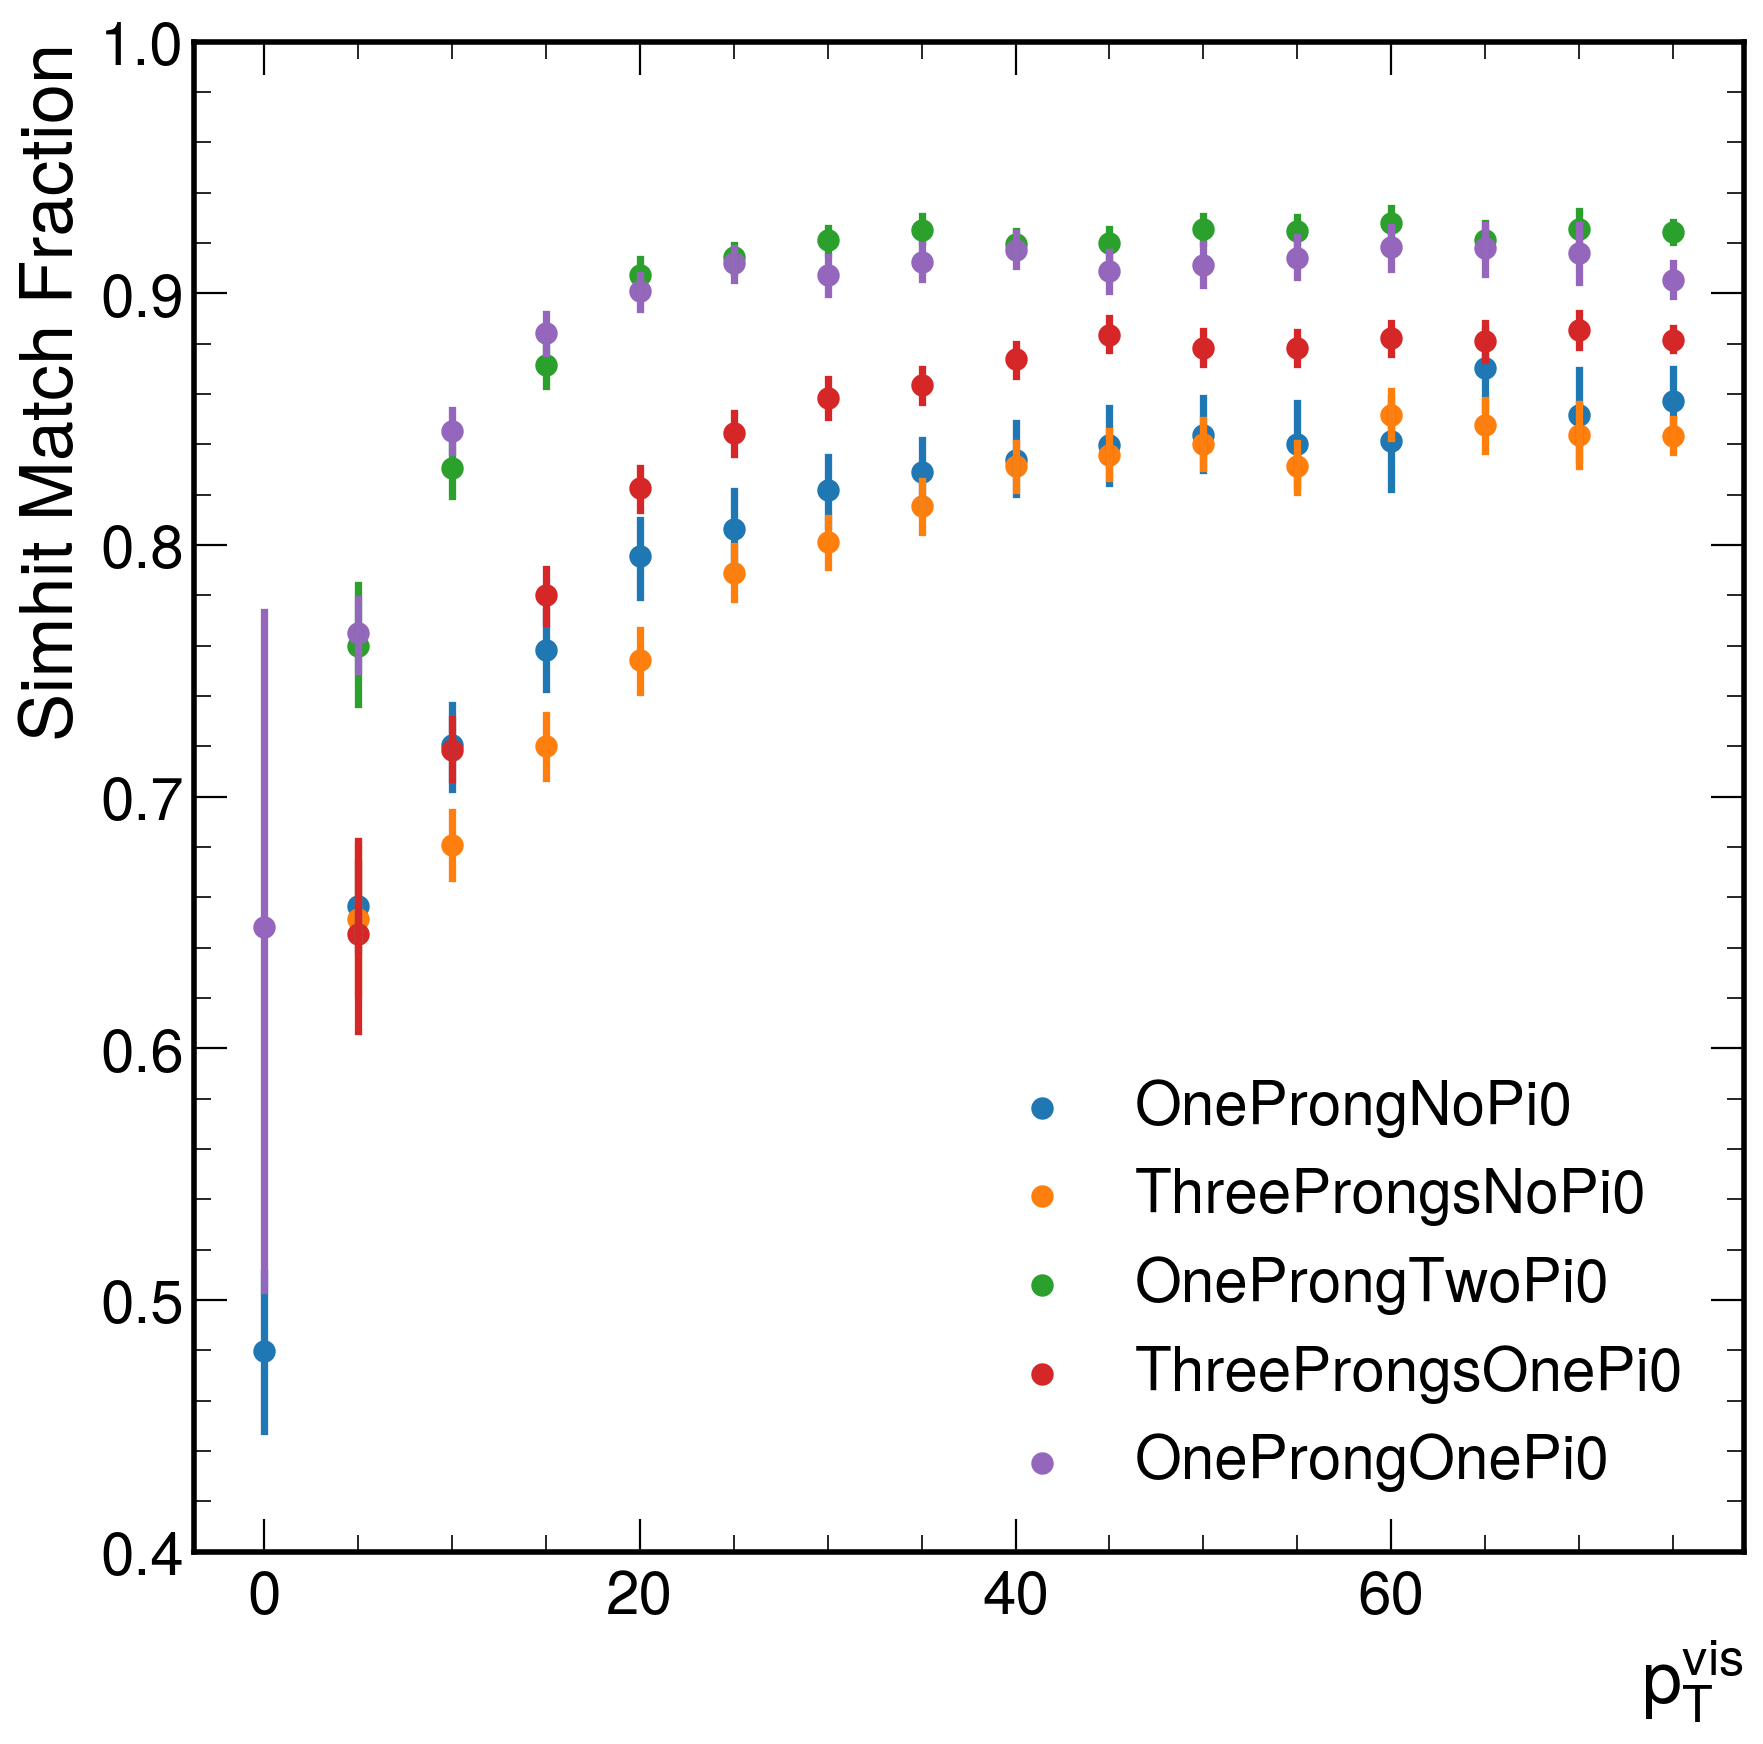

In [28]:
# study sim match eff as a function of tau pt
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    vis_pt = df['vis_pt']
    sns.regplot(x=vis_pt, y=sim_effs, x_bins=np.arange(0,80,5), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$p_T^\mathrm{vis}$")
plt.ylabel("Simhit Match Fraction")
plt.ylim([0.4, 1])
plt.legend(loc='best')
plt.show()

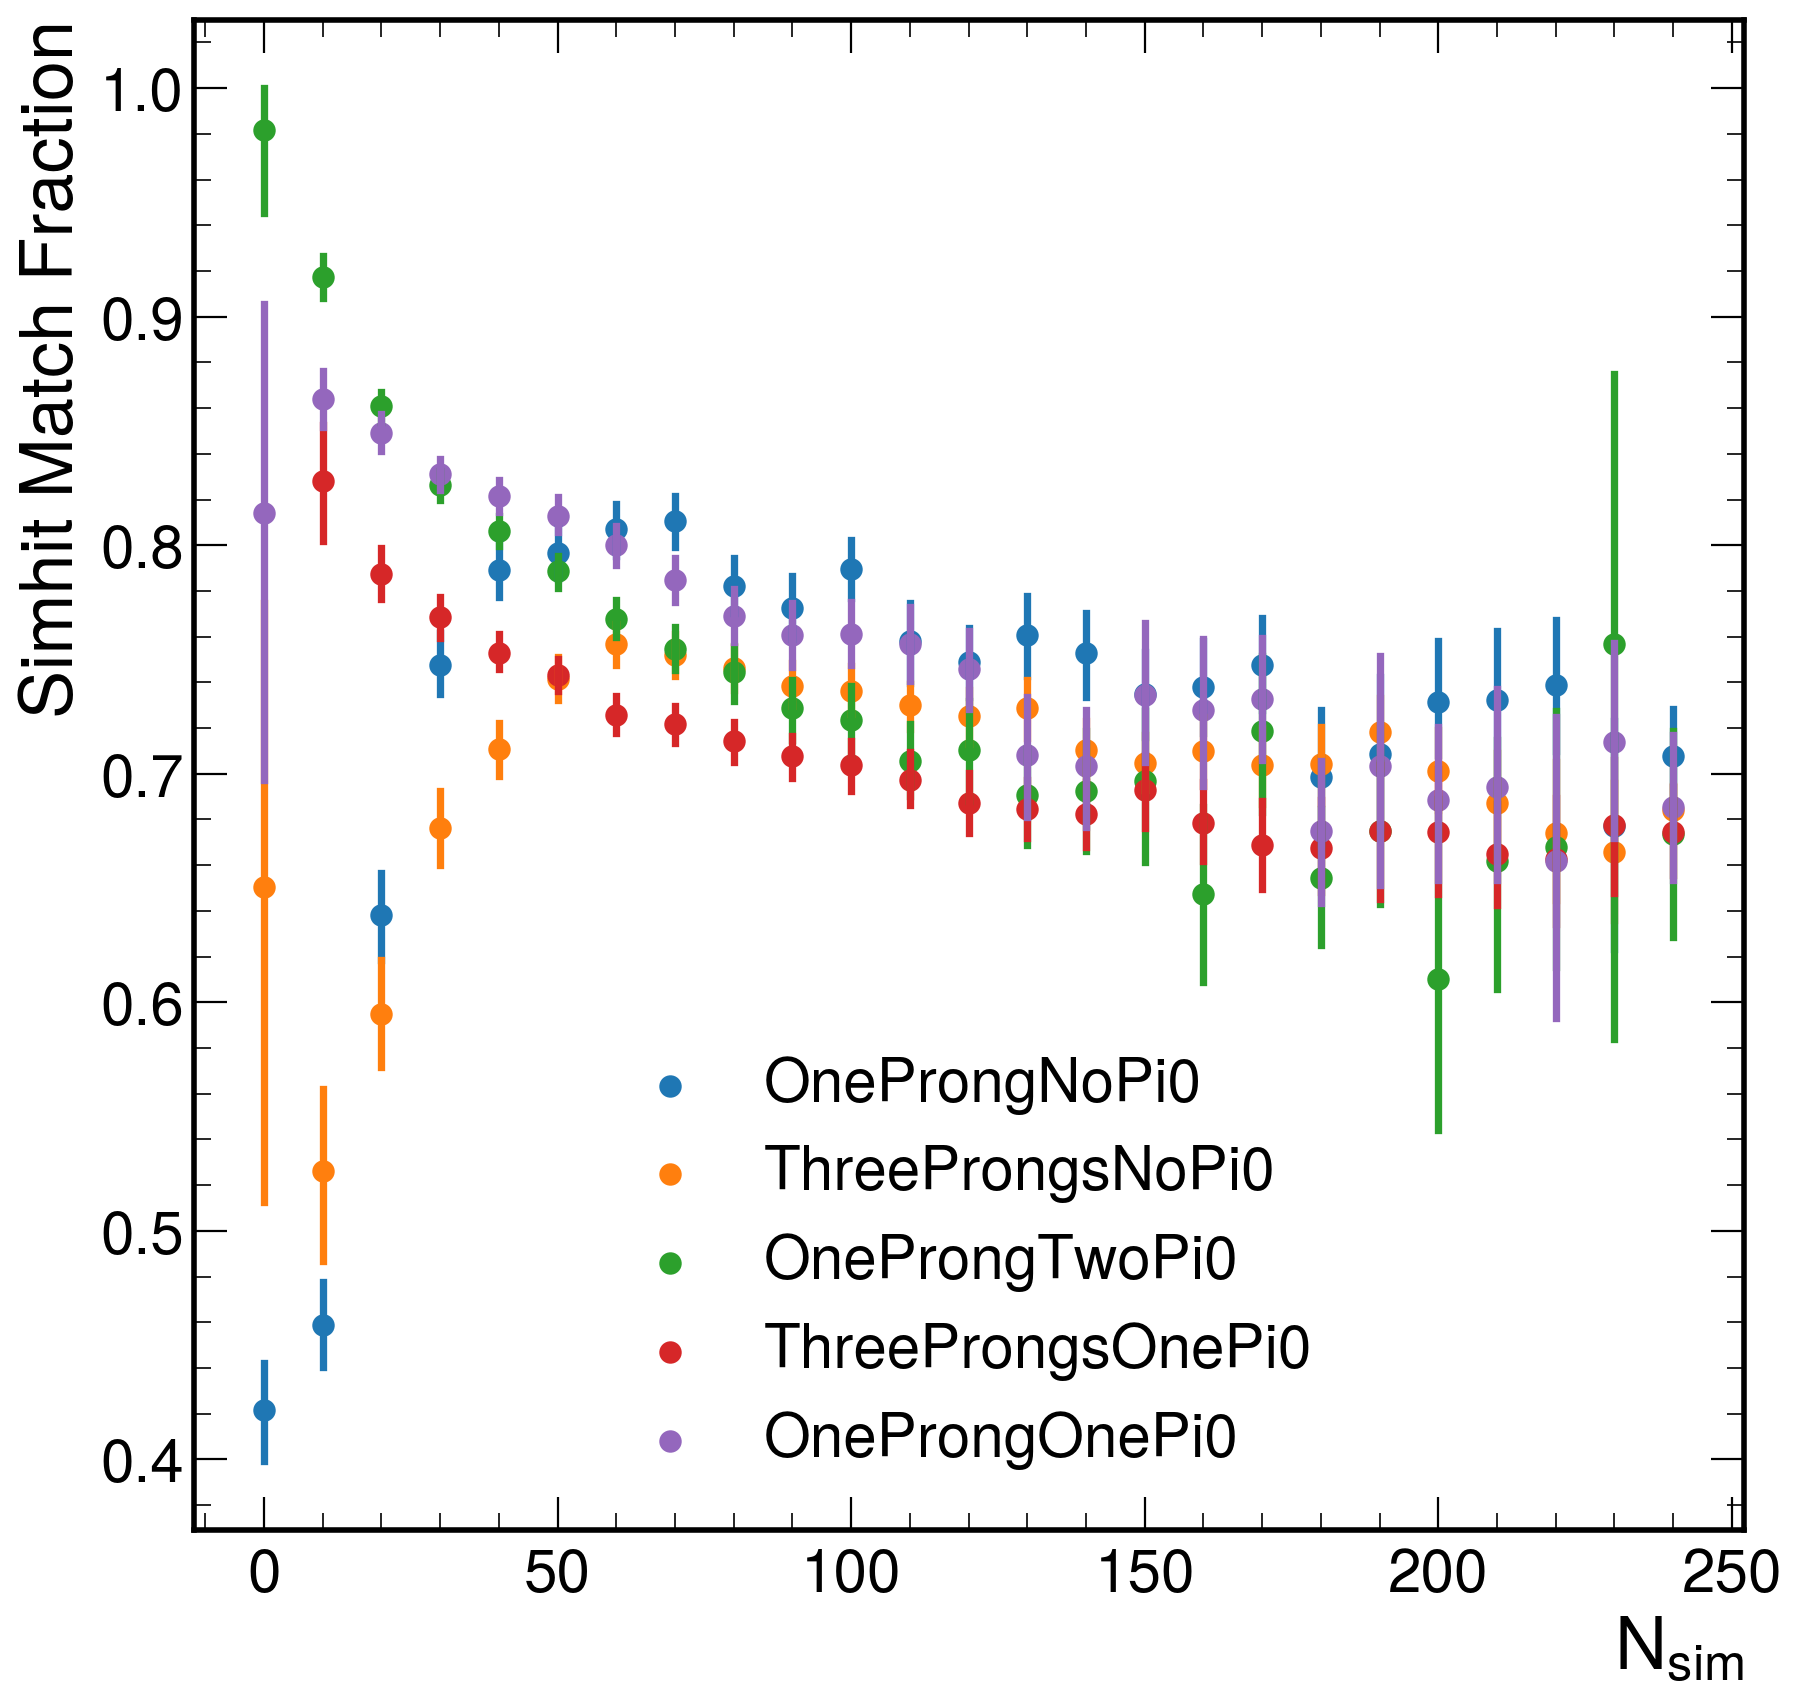

In [6]:
# study sim match eff as a function of n_simhits
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    n_sim = df['total_sim_hits']
    sns.regplot(x=n_sim, y=sim_effs, x_bins=np.arange(0, 250, 10), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$N_\mathrm{sim}$")
plt.ylabel("Simhit Match Fraction")
plt.legend(loc='best')
#plt.ylim([0.5,1])
plt.show()

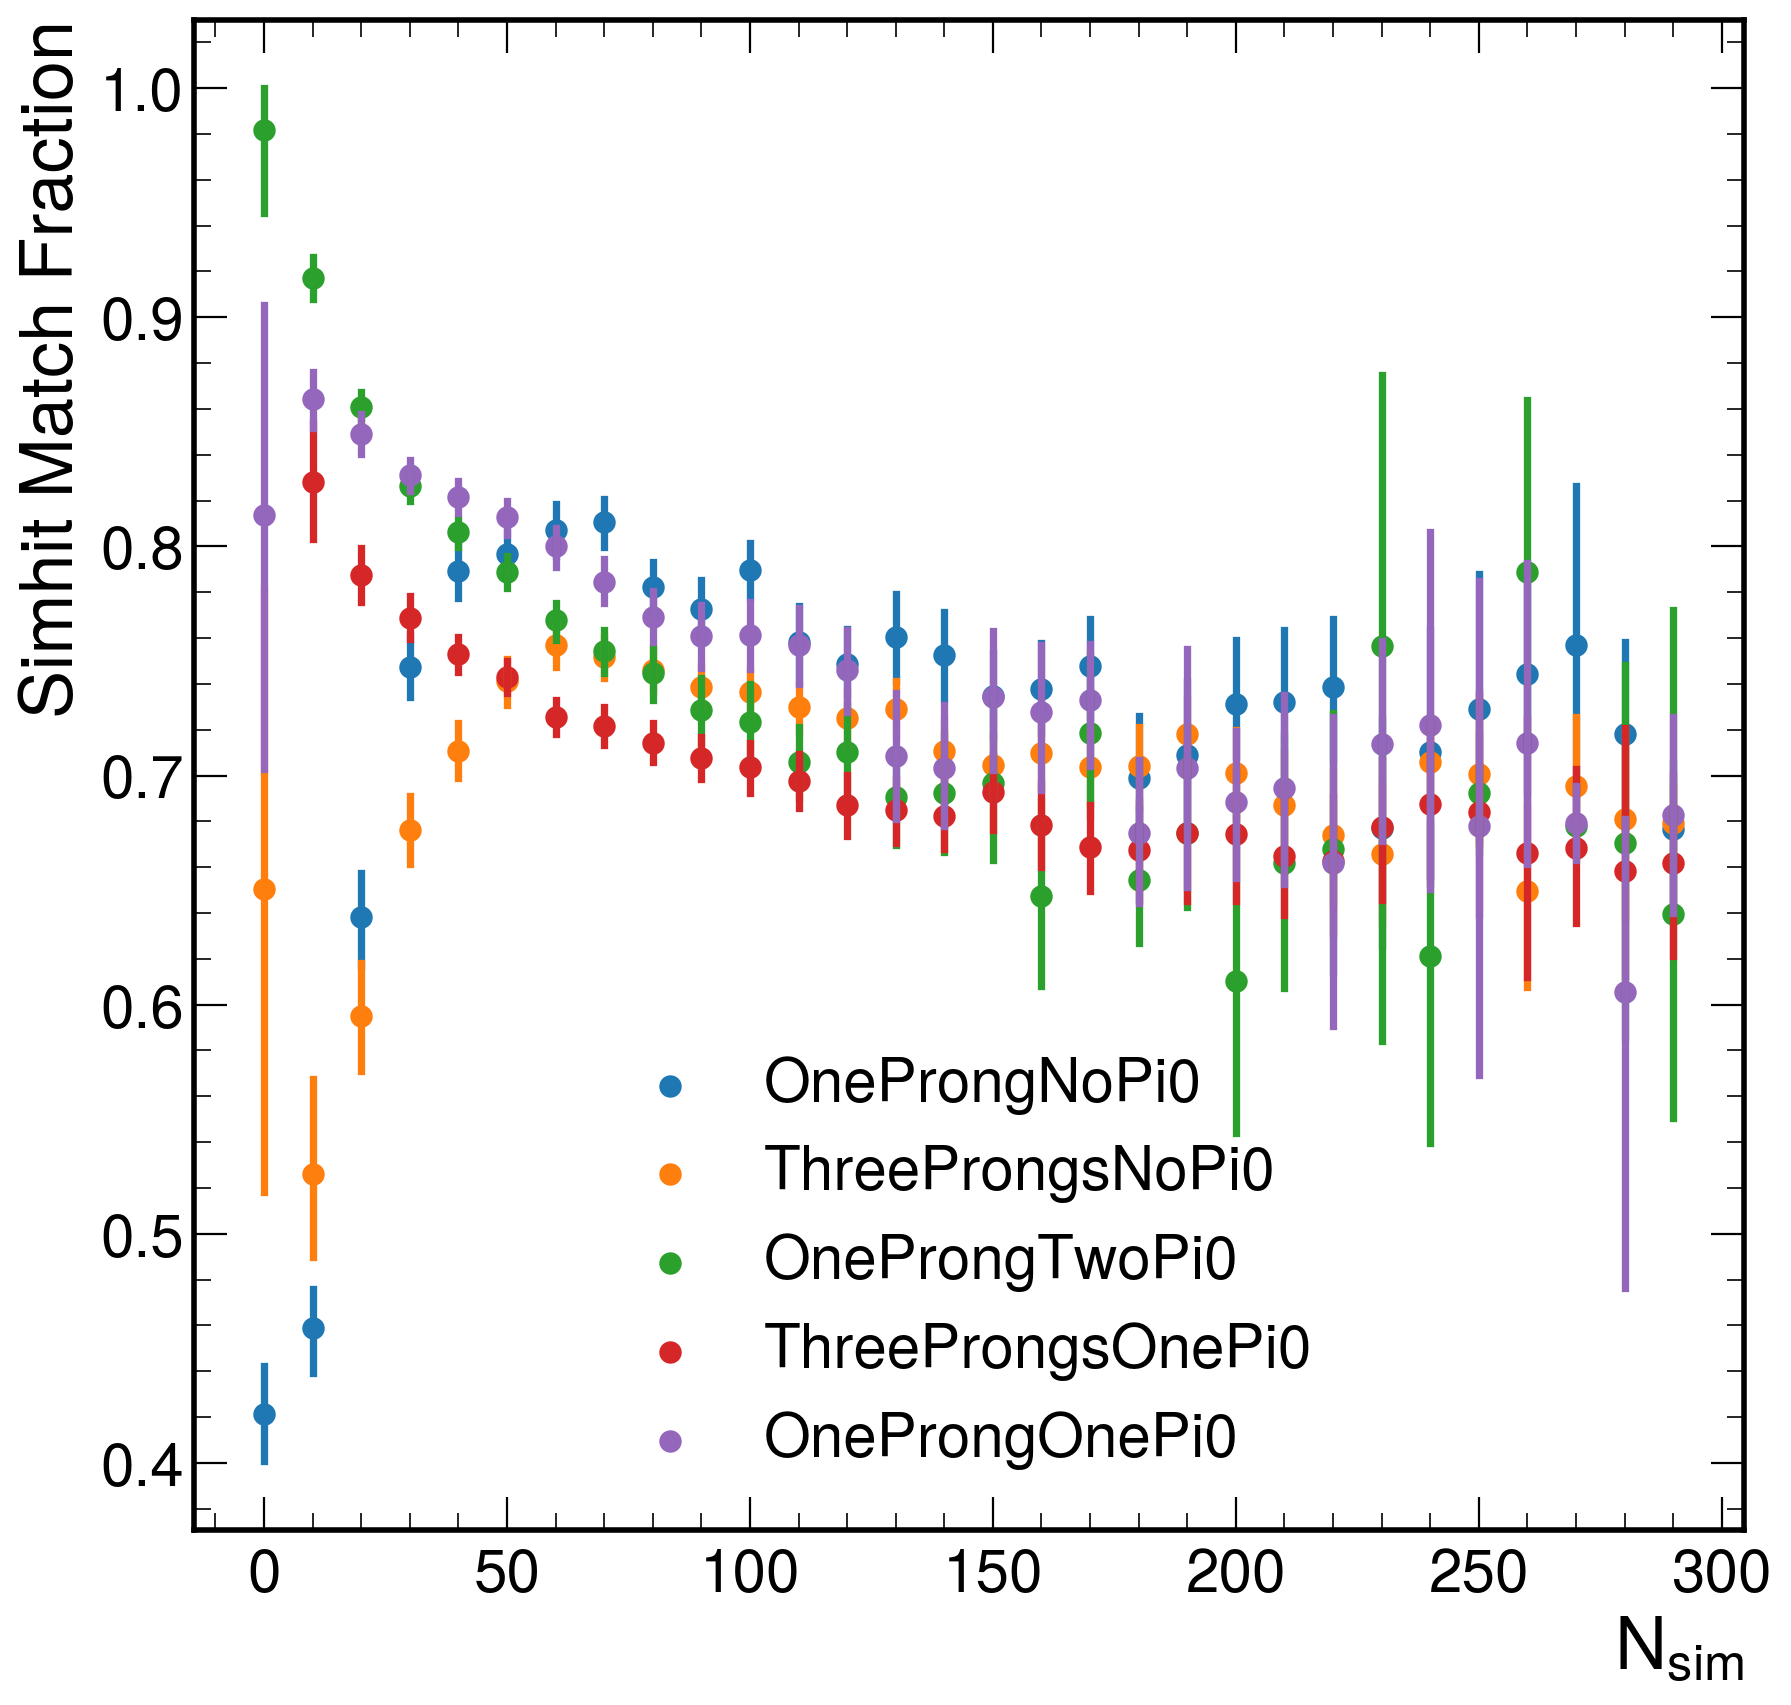

In [7]:
# study sim match eff as a function of n_simhits
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    n_sim = df['total_sim_hits']
    sns.regplot(x=n_sim, y=sim_effs, x_bins=np.arange(0,300,10), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$N_\mathrm{sim}$")
plt.ylabel("Simhit Match Fraction")
plt.legend(loc='best')
#plt.ylim([0.5,1])
plt.show()

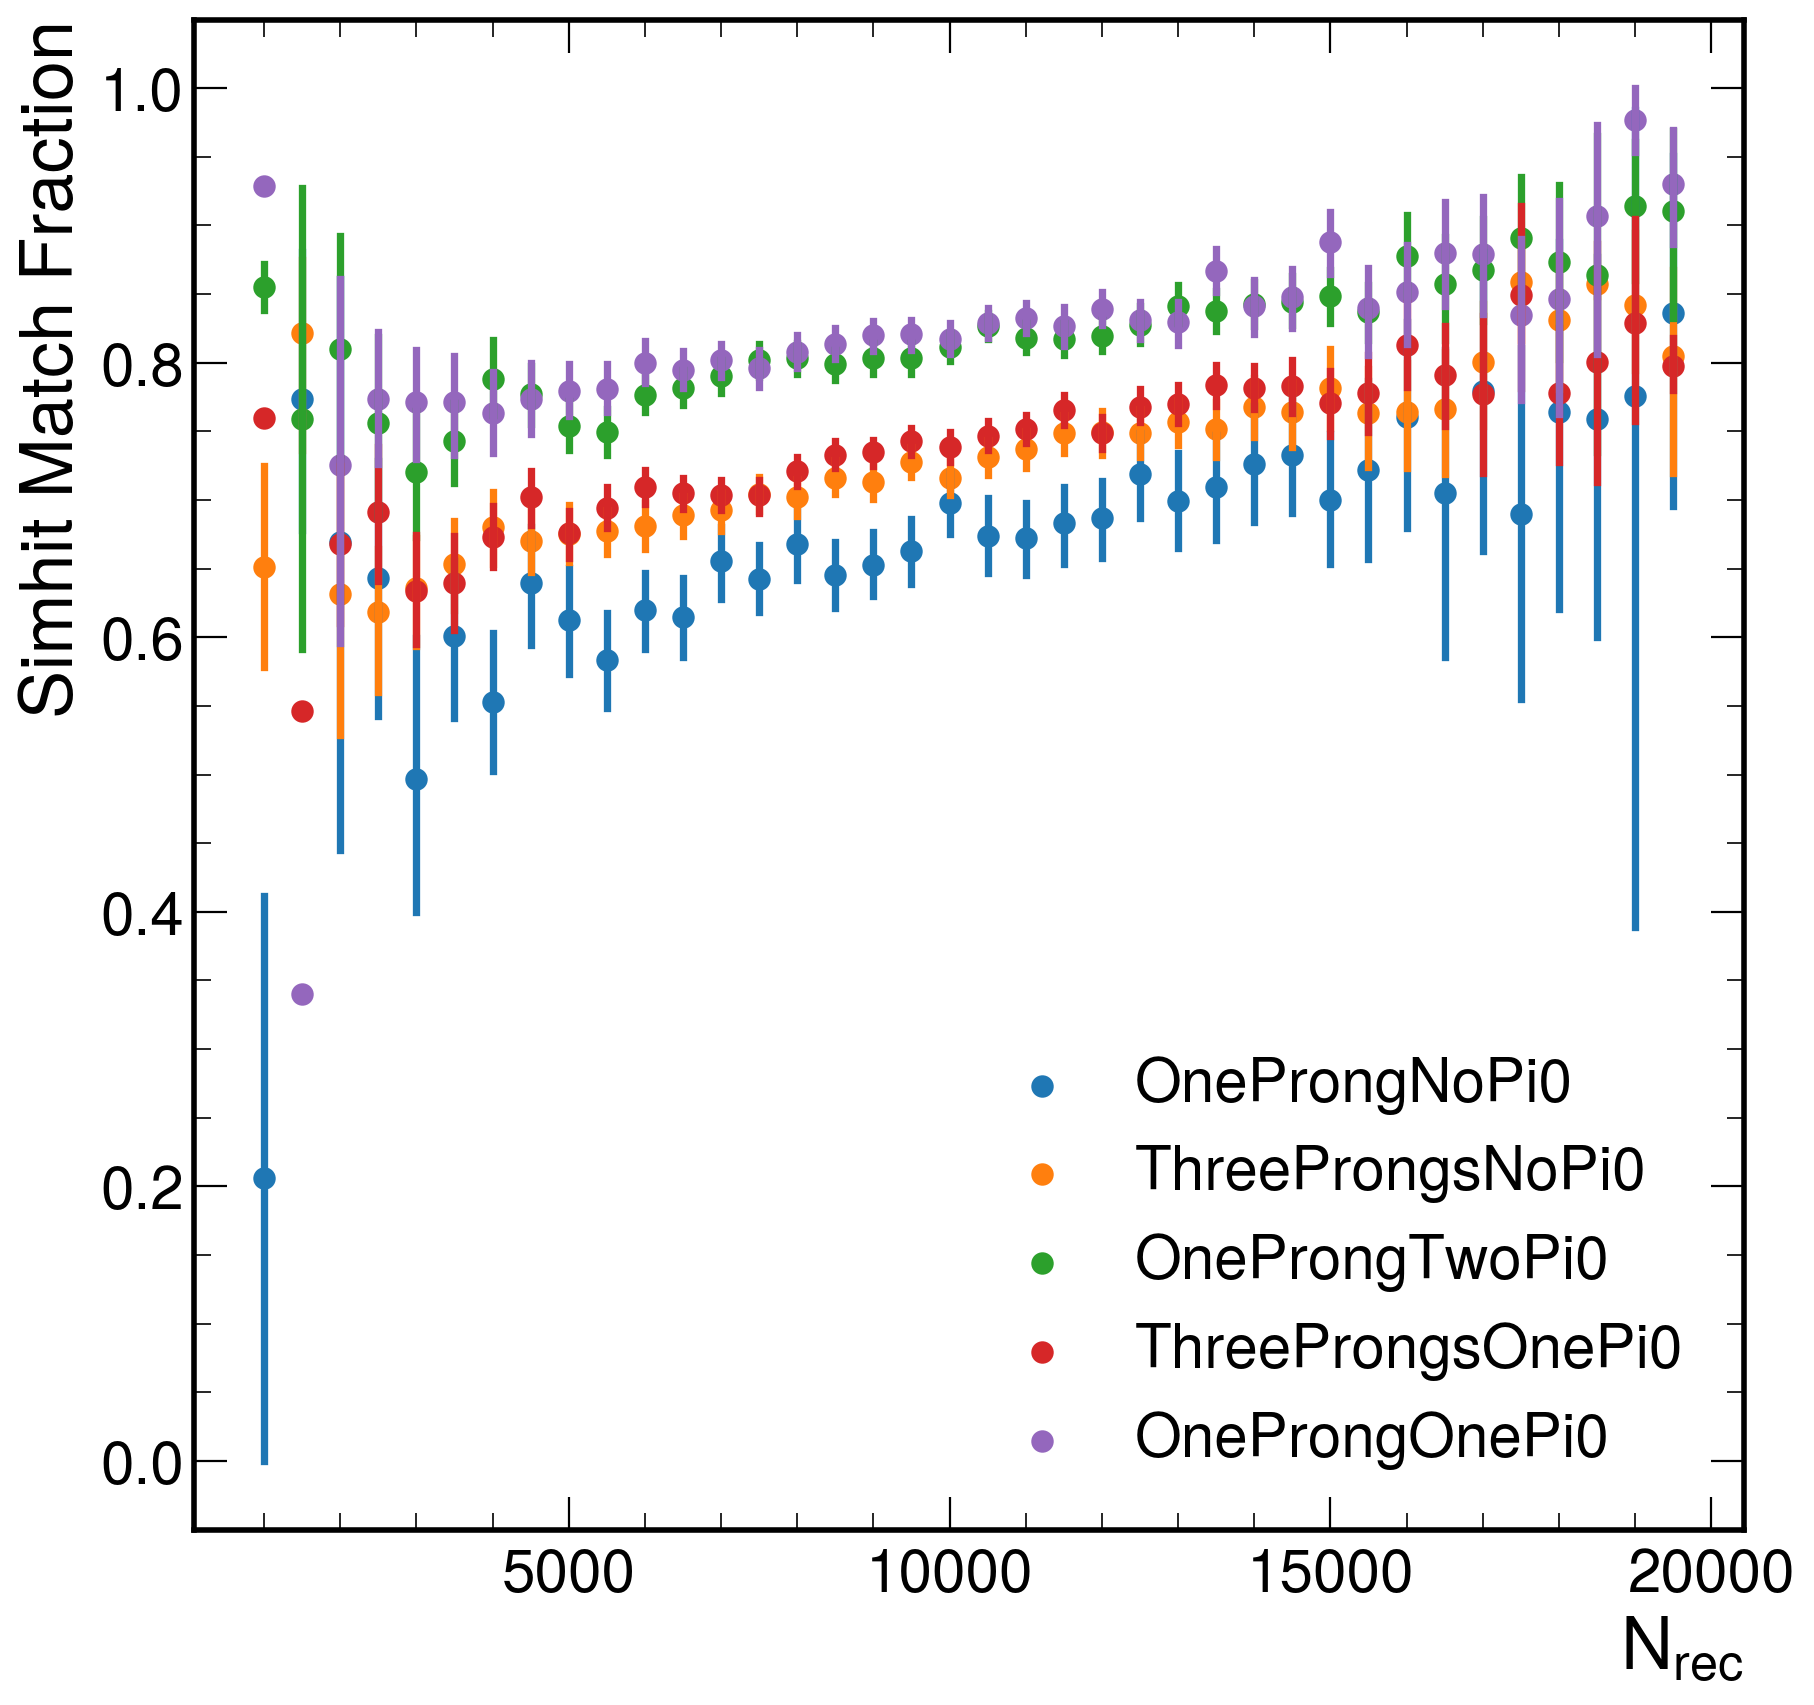

In [8]:
# study sim match eff as a function of n_simhits
fig = plt.figure(dpi=200)
for name, df in data.items():
    sim_effs = df['sim_match_fraction']
    n_rec = df['total_rec_hits']
    sns.regplot(x=n_rec, y=sim_effs, x_bins=np.arange(0,20000,500), 
                marker='o', label=name, fit_reg=False)

plt.xlabel(r"$N_\mathrm{rec}$")
plt.ylabel("Simhit Match Fraction")
plt.legend(loc='best')
#plt.ylim([0.5,1])
plt.show()

OneProngNoPi0
0


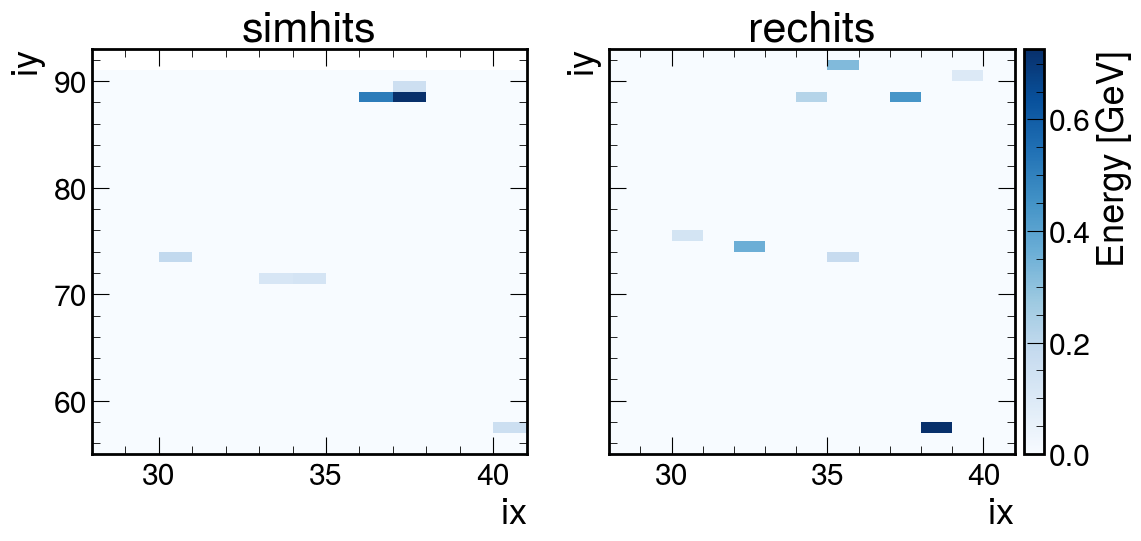

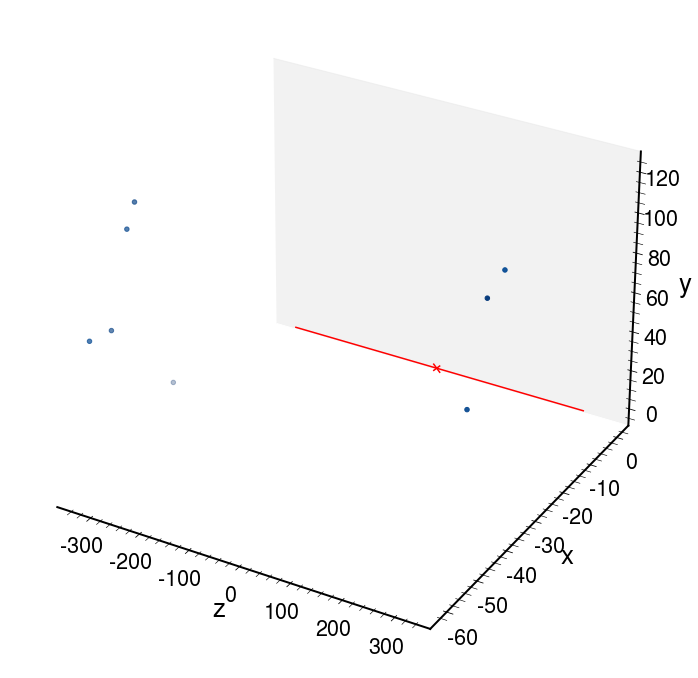

ThreeProngsNoPi0
0


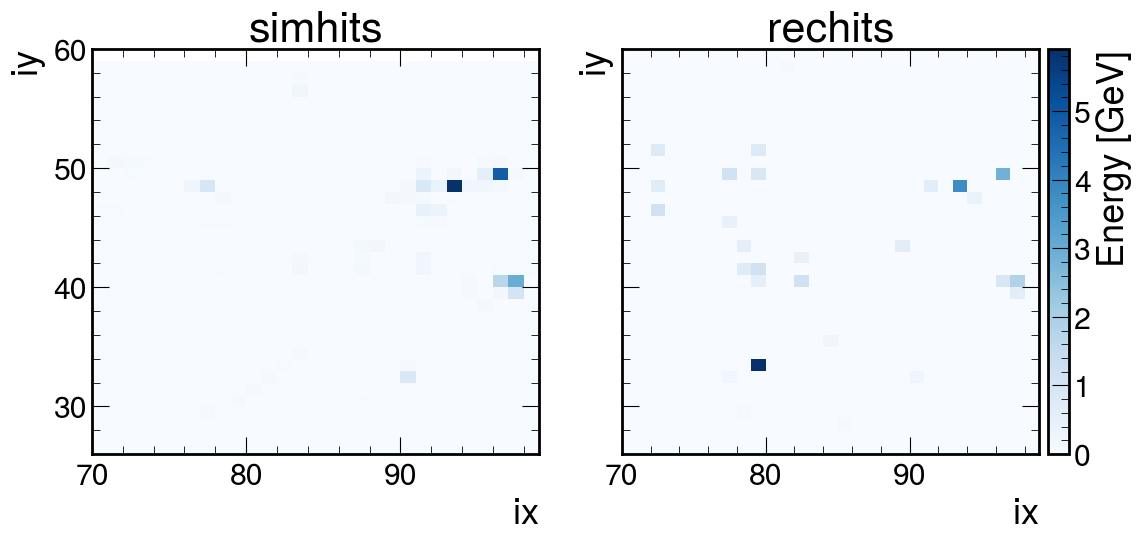

1


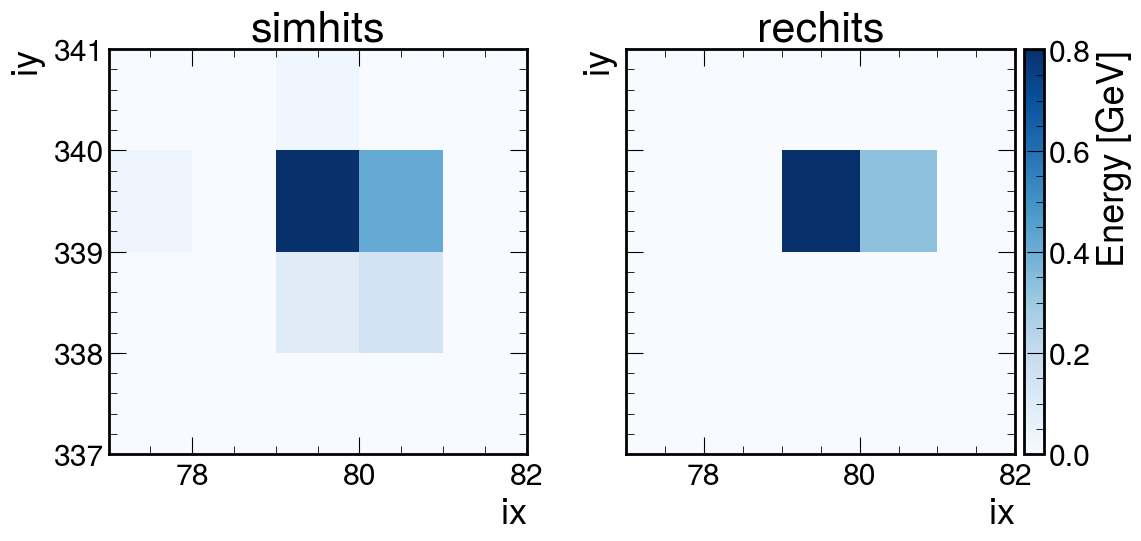

2


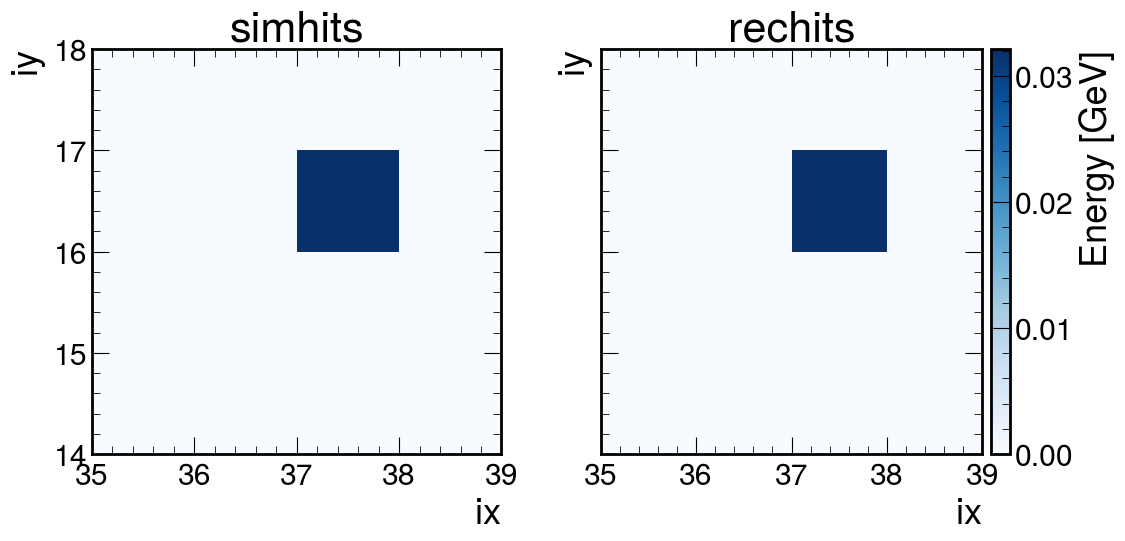

3


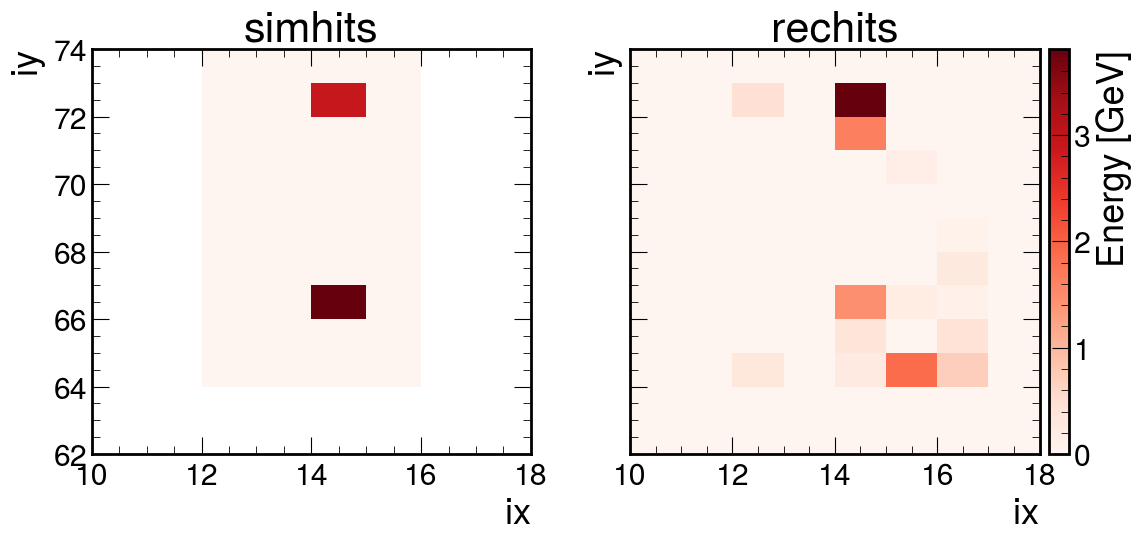

4


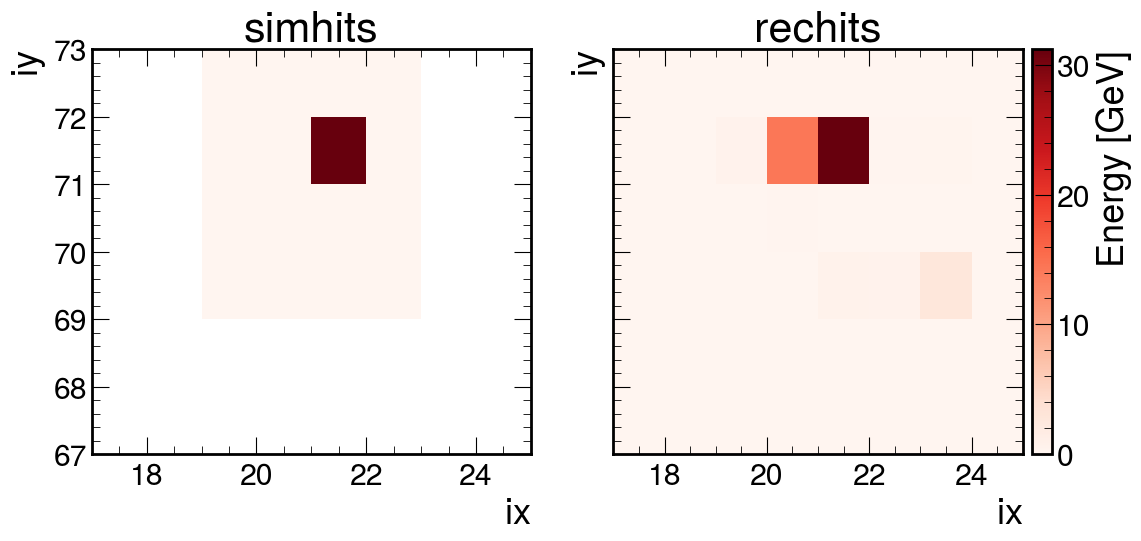

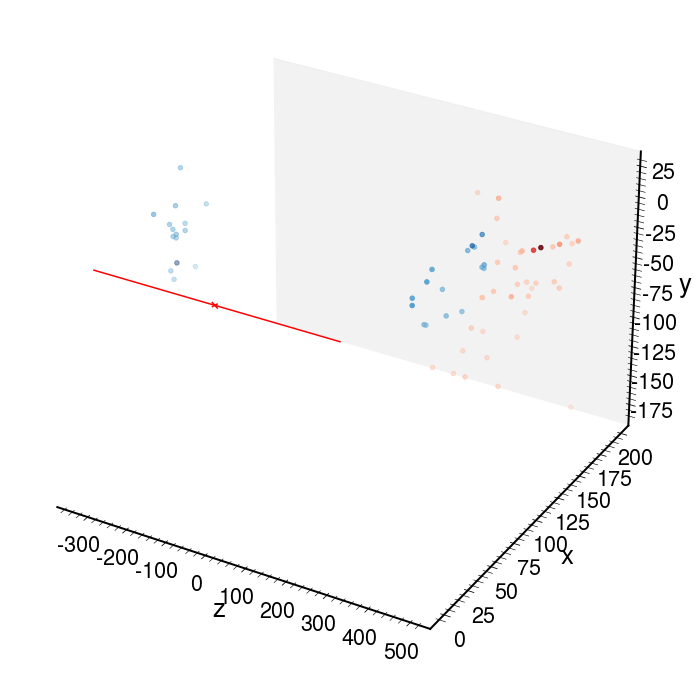

OneProngTwoPi0
1


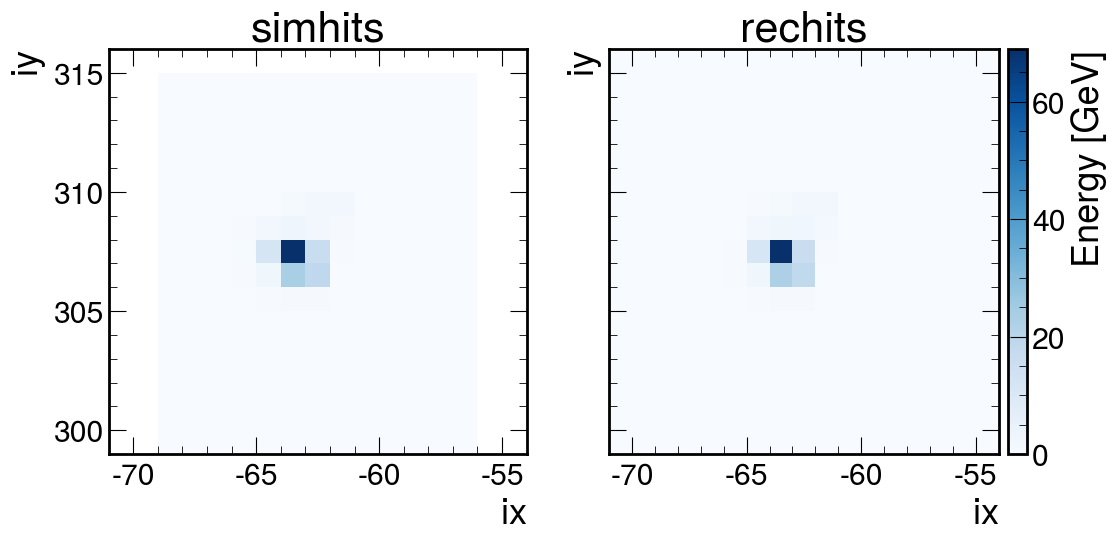

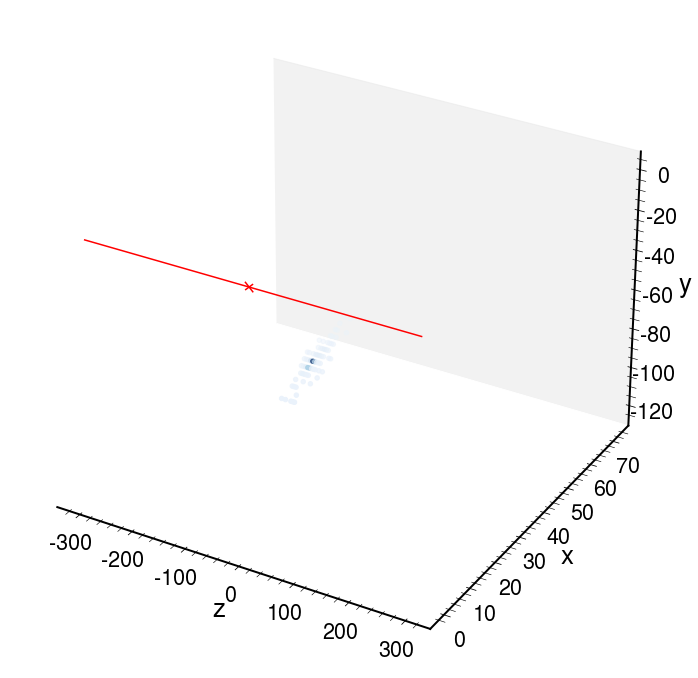

ThreeProngsOnePi0
0


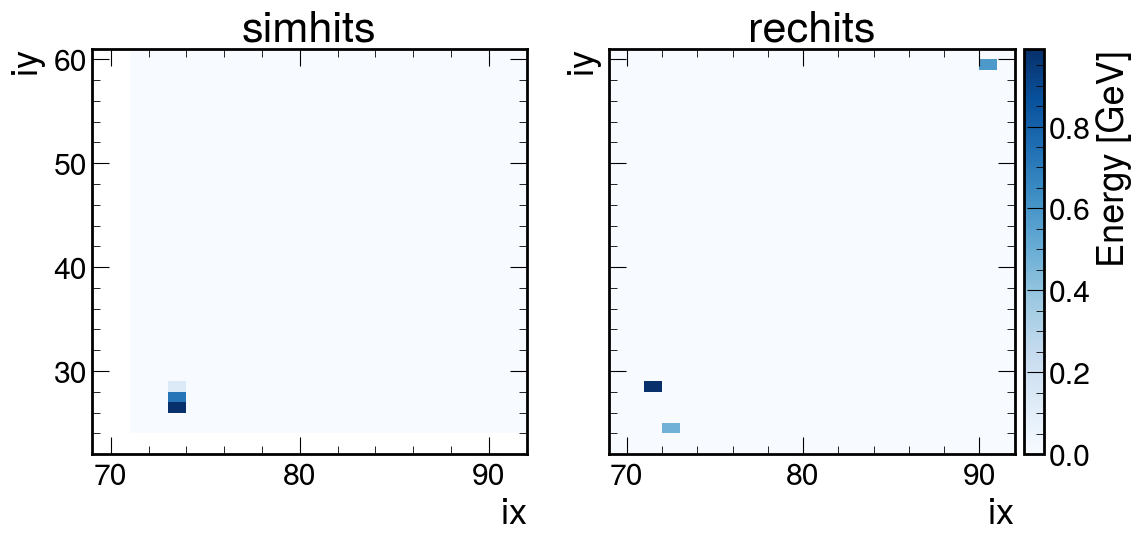

1


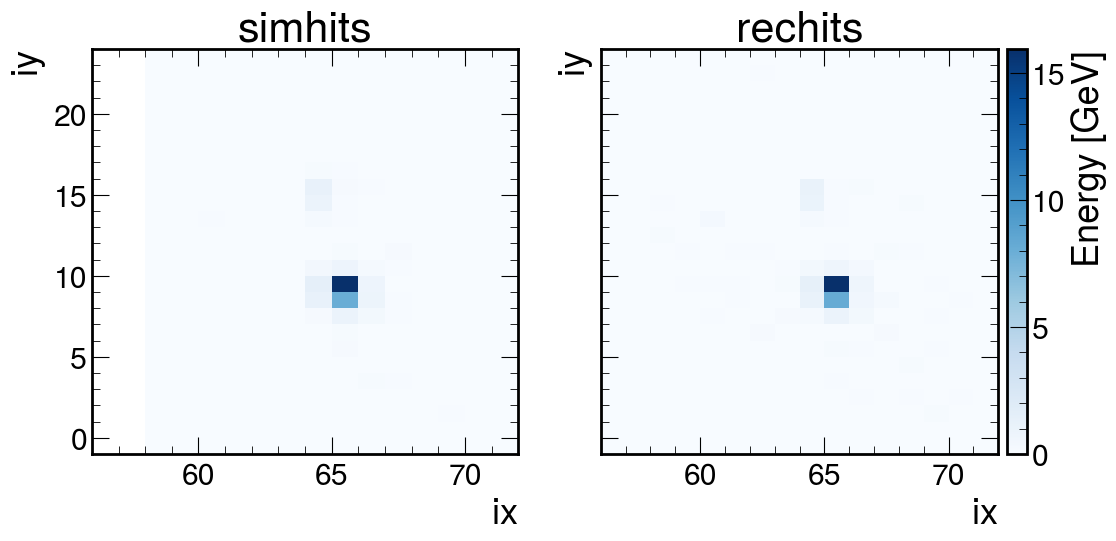

3


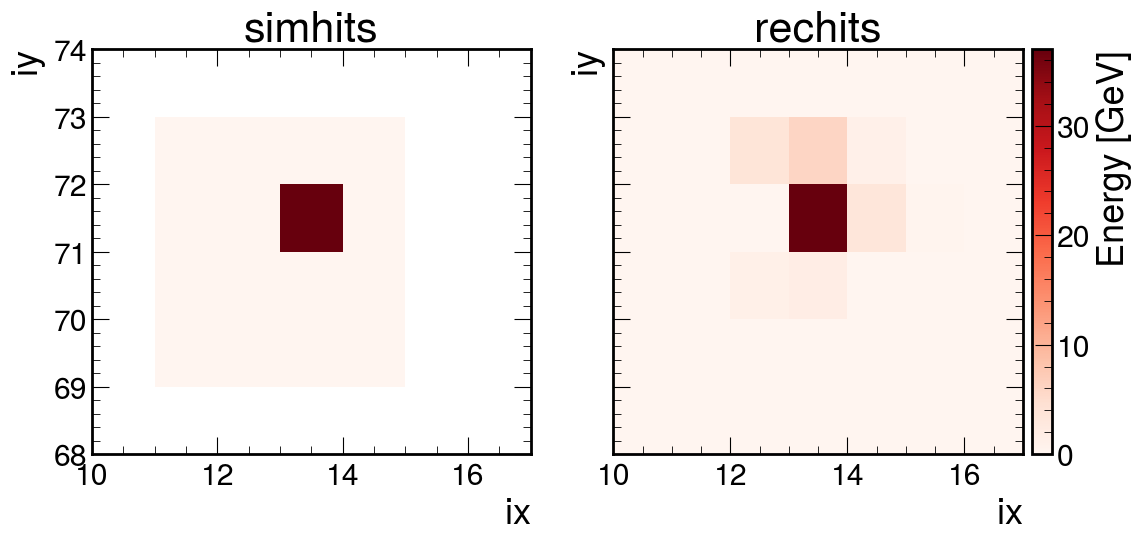

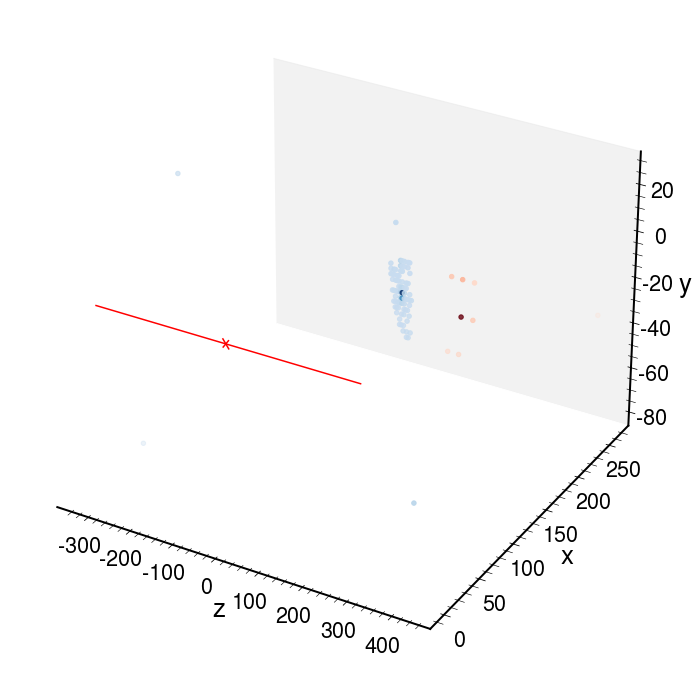

OneProngOnePi0
1


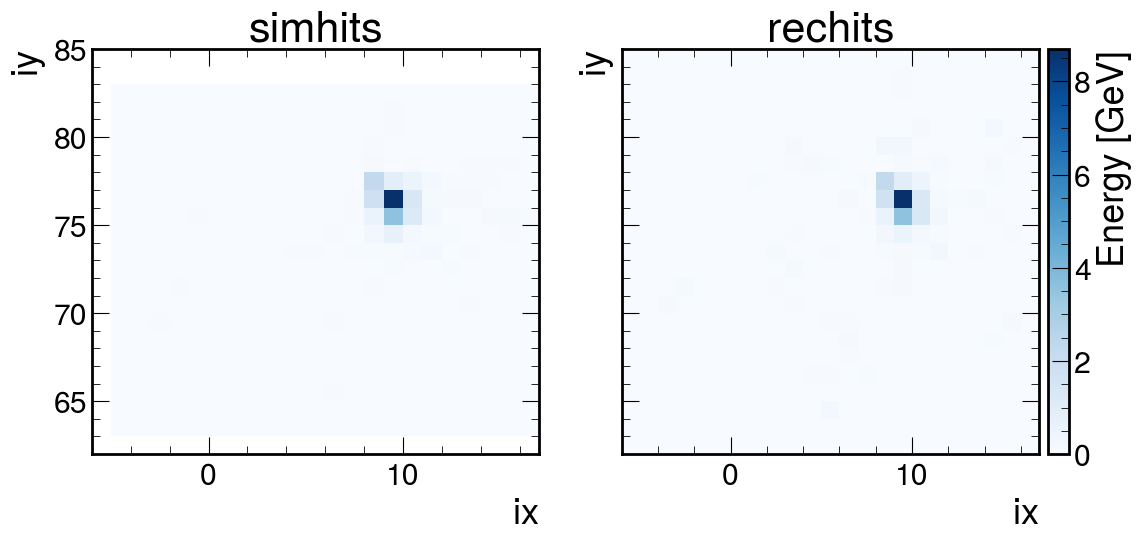

3


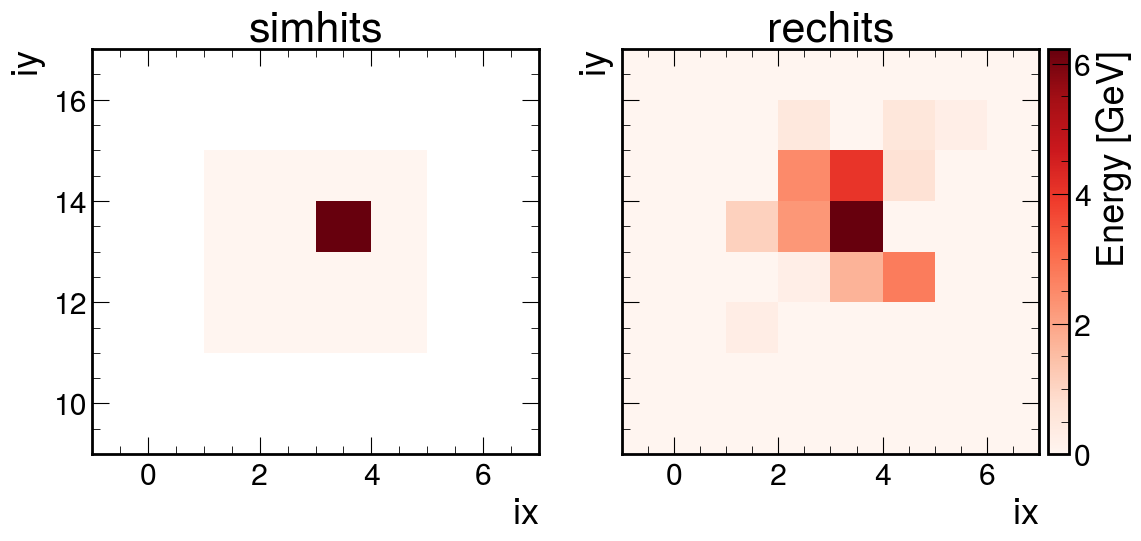

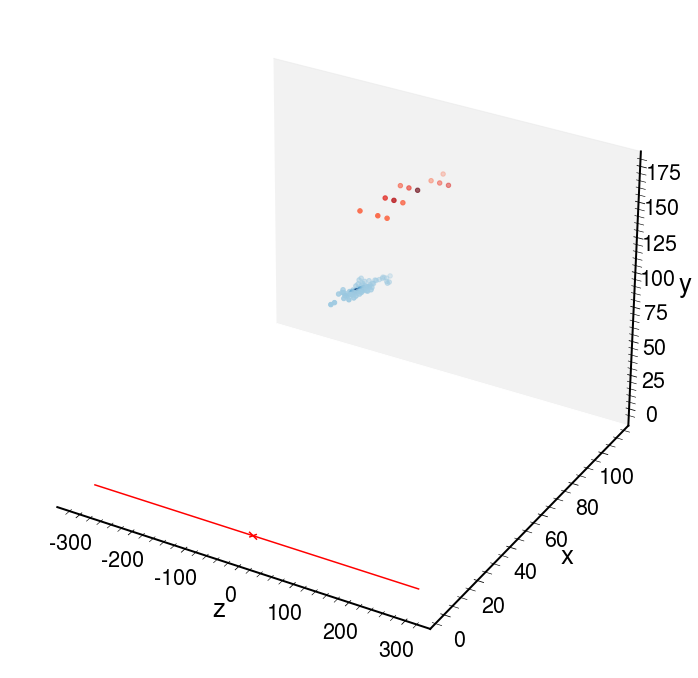

In [36]:
import torch 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def plot_3D(x, y, z, e, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_xlabel("z", labelpad=10)
    ax.set_ylabel("x", labelpad=10)
    ax.set_zlabel("y", labelpad=10)
    ecal_mask = (labels < 3).values
    ax.scatter(z[ecal_mask], x[ecal_mask], y[ecal_mask], 
               cmap='Blues', c=e[ecal_mask], s=20, vmin=-5)
    if np.sum(~ecal_mask)>0:
        ax.scatter(z[~ecal_mask], x[~ecal_mask], y[~ecal_mask],
                   cmap='Reds', c=e[~ecal_mask], s=20, vmin=-5)
    #xlim = np.max(np.abs(list(ax.get_xlim())))
    #ylim = np.max(np.abs(list(ax.get_ylim())))
    #zlim = np.max(np.abs(list(ax.get_zlim())))
    #ax.set_xlim([-xlim, xlim])
    #ax.set_ylim([-ylim, ylim])
    #ax.set_zlim([-zlim, zlim])
    #ax.yaxis._axinfo['juggled'] = (1,1,1)
    #ax.zaxis._axinfo['juggled'] = (1,2,0)
    x, y, z = np.array([[-300,0,0],[0,0,0],[0,0,0]])
    u, v, w = np.array([[300,0,0],[0,0,0],[0,0,0]])
    ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.025, color="red")
    x, y, z = np.array([[300,0,0],[0,0,0],[0,0,0]])
    u, v, w = np.array([[-300,0,0],[0,0,0],[0,0,0]])
    ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.025, color="red")
    #ax.set_axis_off()
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    #ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.grid(False)
    plt.tight_layout()
    plt.show()

def plot_cluster(ax, ieta, iphi, energy, r=[], sd=0):
    cmap = 'Blues' if sd<3 else 'Reds'
    ibins = (np.arange(np.min(ieta)-2, np.max(ieta)+3, 1), 
             np.arange(np.min(iphi)-2, np.max(iphi)+3 ,1))
    h = ax.hist2d(ieta, iphi, bins=ibins, weights=energy, 
                  cmap=cmap, vmin=0)
    ax.set_xlabel(r"$ix$")
    ax.set_ylabel(r"$iy$")
    return h

def plot_rec_vs_sim(ix_rec, iy_rec, energy_rec, ix_sim, iy_sim, energy_sim,
                    sd=0, zoom_rec=False, extend_range=False):     
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=100,
                            sharex=True, sharey=True)
    plot_cluster(axs[0], ix_sim, iy_sim, energy_sim, sd=sd)
    h = plot_cluster(axs[1], ix_rec, iy_rec, energy_rec, sd=sd)

    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.09)
    cbar = plt.colorbar(h[3], cax=cax)
    #cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Energy [GeV]')#, rotation=270)
    
    if extend_range:
        axs[0].set_xlim([axs[0].get_xlim()[0]-2, 
                         axs[0].get_xlim()[1]+2])
        axs[0].set_ylim([axs[0].get_ylim()[0]-2, 
                         axs[0].get_ylim()[1]+2])
    
    if zoom_rec:
        xlim = [axs[0].get_xlim()[0]-10, axs[0].get_xlim()[1]+10]
        ylim = [axs[0].get_ylim()[0]-10, axs[0].get_ylim()[1]+10]
        axs[1].set_xlim(xlim)
        axs[1].set_ylim(ylim)
        
    axs[0].set_title("simhits")
    axs[1].set_title("rechits")
    plt.tight_layout()
    plt.show()
    
    
for name, df in data.items():
    #if name!='OneProngTwoPi0': continue
    graph_dir = os.path.join('../graphs/task_0', name)
    graphs = os.listdir(graph_dir)
    index = np.random.choice(len(graphs), 1, replace=False)  
    for i in index:
        print(name)
        g = torch.load(os.path.join(graph_dir, graphs[i]))
        sds = np.unique(g.rec['subdetector_label'].values)
        if len(g.rec['energy_rec'])==0: continue 
        if len(g.sim['energy_sim'])==0: continue
        for sd in sds:
            print(sd)
            rec_mask = ((g.rec['subdetector_label']==sd) & (g.rec['energy_rec']>0.01))
            sim_mask = ((g.sim['subdetector_label']==sd) & (g.sim['energy_sim']>0.01))
            plot_rec_vs_sim(g.rec['ix_rec'][rec_mask], g.rec['iy_rec'][rec_mask], g.rec['energy_rec'][rec_mask], 
                            g.sim['ix_sim'][sim_mask], g.sim['iy_sim'][sim_mask], g.sim['energy_sim'][sim_mask],
                            sd=sd, zoom_rec=False, extend_range=False)
    
        plot_3D(g.rec['x_rec'], g.rec['y_rec'], g.rec['z_rec'],
                g.rec['energy_rec'], g.rec['subdetector_label'])